# MODEL 1  - CIMTA

**CIMTA** is a `sequential neural model` . It is binary classification model simulated using `tensorflow` sequential model

In [7]:
# imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

In [8]:
# using drive to load our dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ABOUT DATASET

This dataset is created by us for this specific usecase . It contains the following fields `doc_id`,`num_patients`,`avg_wait_time`,`time_to_hospital`,`doc_rating`,`can_go`

|fields|range|source|
|---|---|---|
|doc_id|xxxxx|UUID from database|
|num_patients|>=0|realtime data from the admin app|
|avg_wait_time|>=0|UNIT:minutes from admin app|
|time_to_hospital|>=0|UNIT:minutes from `GMAP` api|
|doc_rating|10-0|admin app|
|can_go|0  or 1|class to predicted by model|

In [9]:
# loading dataset and started to cleanse the data
cols = ["doc_id","num_patients","avg_wait_time","time_to_hospital","doc_rating","can_go"]
df = pd.read_csv("/content/drive/MyDrive/dataset/data.csv",names=cols) # loading
df.dropna(inplace=True) # droping fields with null values
del df['doc_id'] # we dont need doc_id for training our neural net
df

num_patients  avg_wait_time  time_to_hospital  doc_rating  can_go
0                1           15.0              10.0           7     1.0
1                2           10.0              15.0           8     1.0
2                3            5.0              20.0           6     1.0
3                4           12.0               5.0           9     0.0
4                5            8.0              25.0           5     0.0
...            ...            ...               ...         ...     ...
2579             6           13.0              66.7           8     0.0
2580             7           17.3              71.4           9     0.0
2581             8           11.5              76.1           7     0.0
2582             9           13.8              80.8           8     0.0
2583            10           18.1              85.5           9     0.0

[2583 rows x 5 columns]

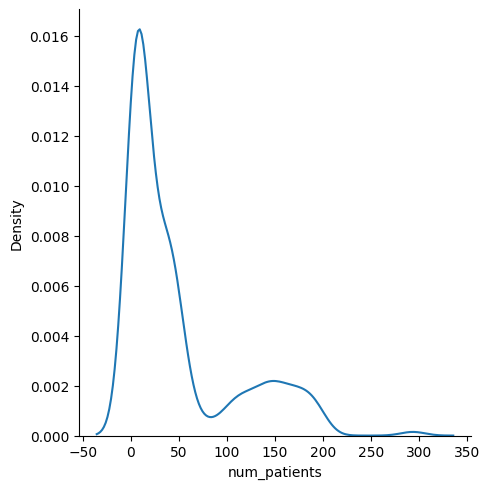

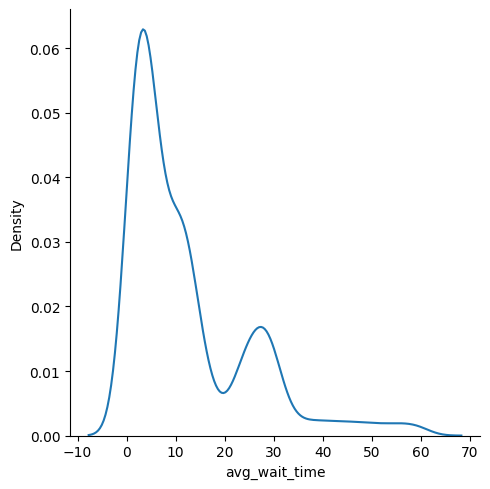

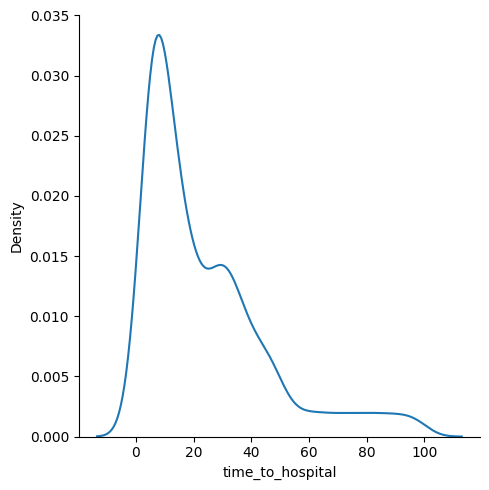

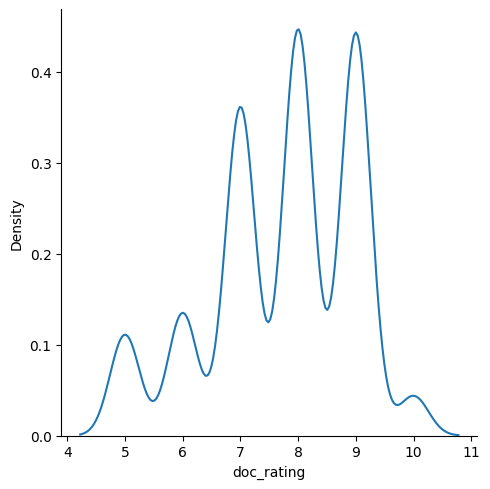

In [10]:
# checking distribution of the data
for i in cols[1:-1]:
  sns.displot(df[i],kind="kde")

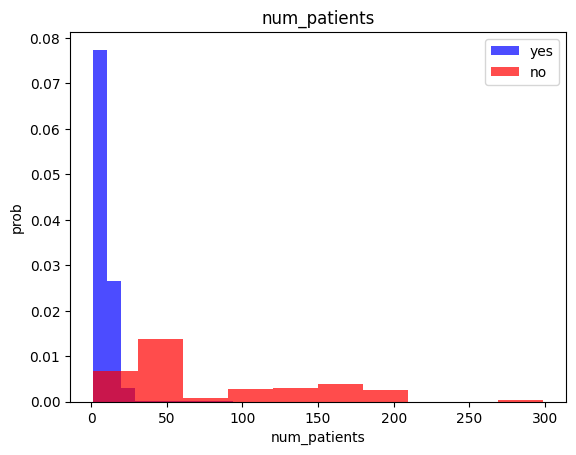

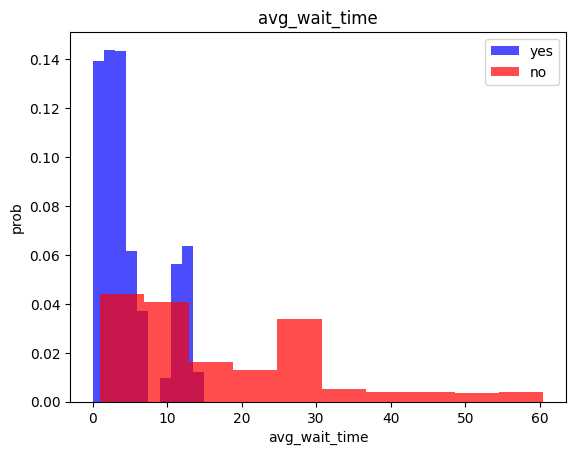

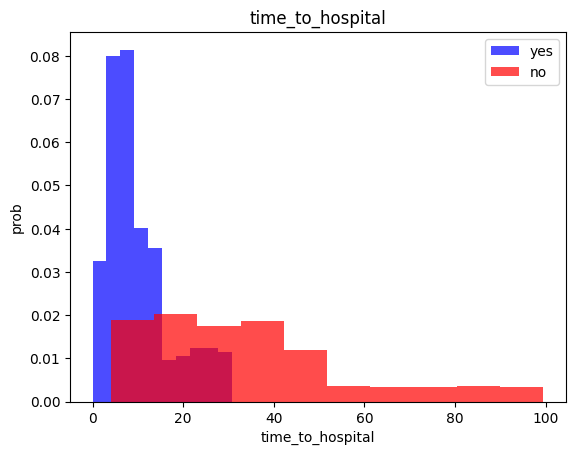

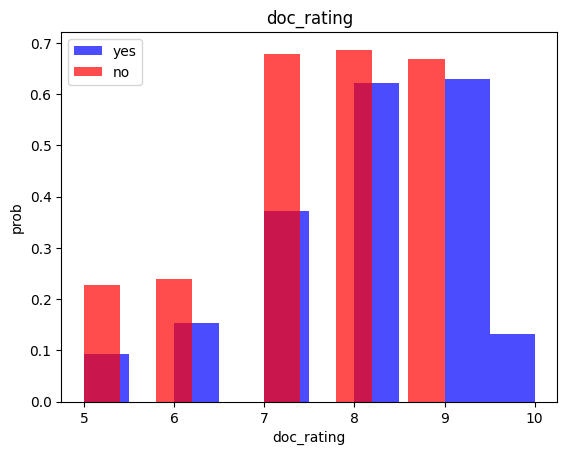

In [11]:
for l in cols[1:-1]:
    plt.hist(df[df["can_go"]==1][l],color="blue",label="yes",alpha=0.7,density=True)
    plt.hist(df[df["can_go"]==0][l],color="red",label="no",alpha=0.7,density=True)
    plt.title(l)
    plt.ylabel("prob")
    plt.xlabel(l)
    plt.legend()
    plt.show()

# CONCLUSION

we can see dataset is now clean and well distributed which is good for our usecase .

# PREPARING DATASET

Now let us create `train`,`test` and `validation` dataset by spliting the whole dataset in 3 parts with a split percentage of `75%,15%,15%`

In [12]:
# spliting
train,valid,test = np.split(df.sample(frac=1),[int(0.7*len(df)),int(0.85*len(df))])

# scale and sampling

we need to make sure our class:`can_go` contains equal number of zero's and one's . so we oversample our data to make the count equal

scaling is not required for the dataset we made sure of it while creating dataset . scaling is used to equalize the gap between values of each columns

In [13]:
# function to scale our data
def scale(df,os=False):
   x = df[df.columns[:-1]].values
   y = df[df.columns[-1]].values

   if os:
    ros = RandomOverSampler()
    x, y=ros.fit_resample(x,y)

   data = np.hstack((x,np.reshape(y,(-1,1))))

   return data,x,y

In [14]:
# creating the splits
train,x_train,y_train = scale(train,os=True)
valid,x_valid,y_valid = scale(valid)
test,x_test,y_test = scale(test)

In [15]:
# function to evaluate the Neural Nets loss and accuracy

def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

# Model

In [16]:
# function to create the model

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(4,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

4 nodes, dropout 0, lr 0.01, batch size 16


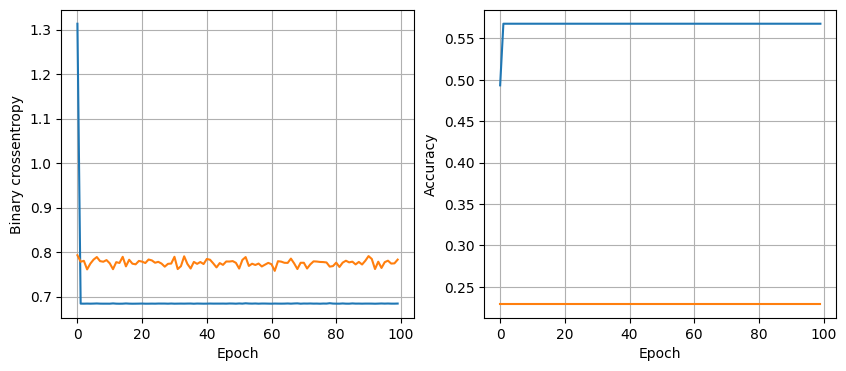

13/13 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5375
4 nodes, dropout 0, lr 0.01, batch size 32


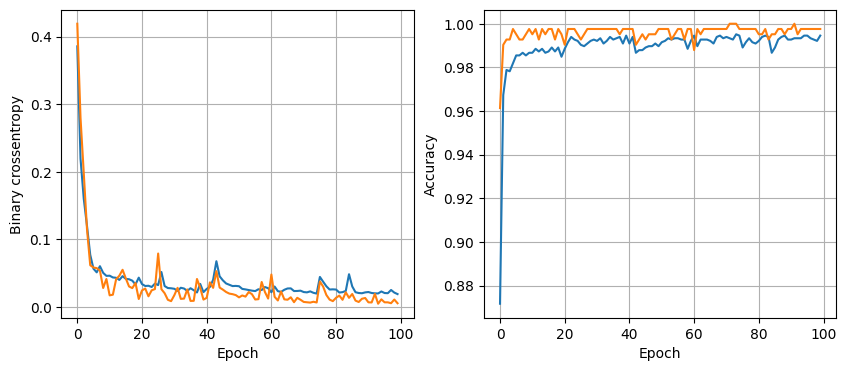

13/13 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9793
4 nodes, dropout 0, lr 0.01, batch size 64


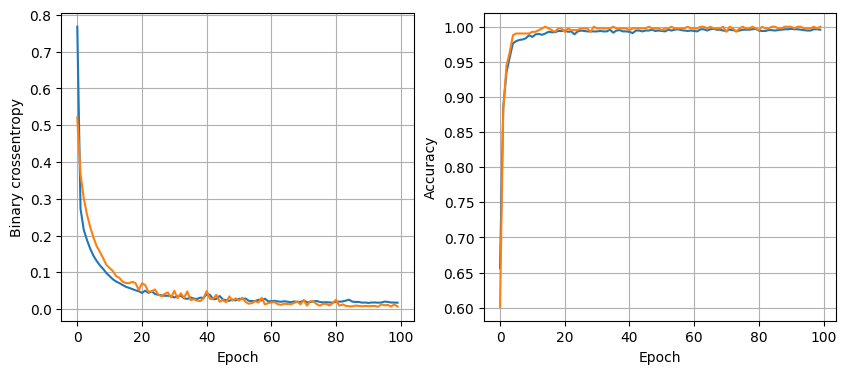

13/13 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9871
4 nodes, dropout 0, lr 0.01, batch size 128


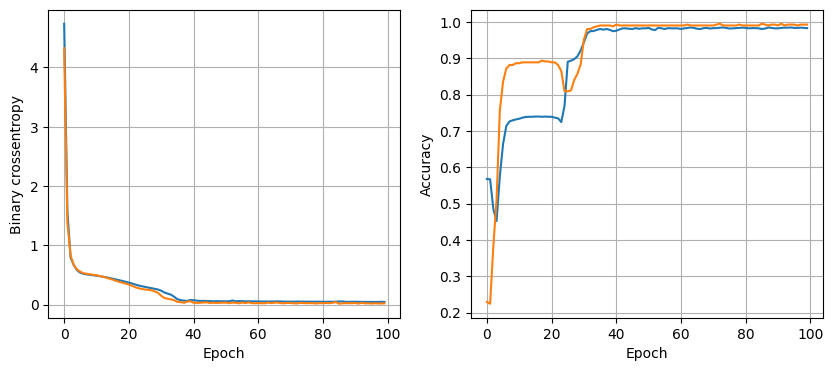

13/13 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9742
4 nodes, dropout 0, lr 0.005, batch size 16


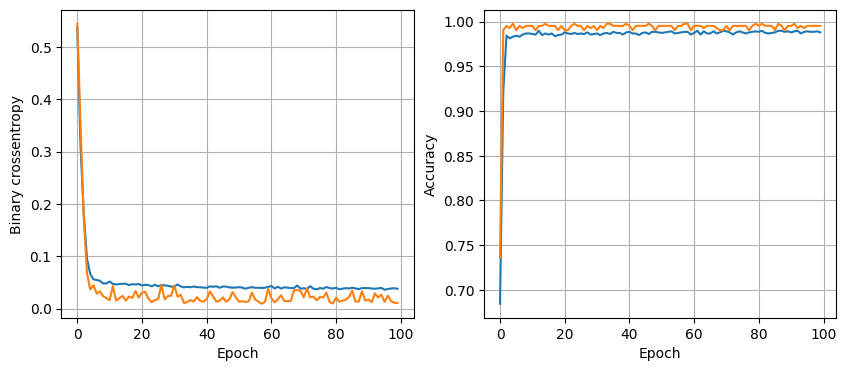

13/13 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9793
4 nodes, dropout 0, lr 0.005, batch size 32


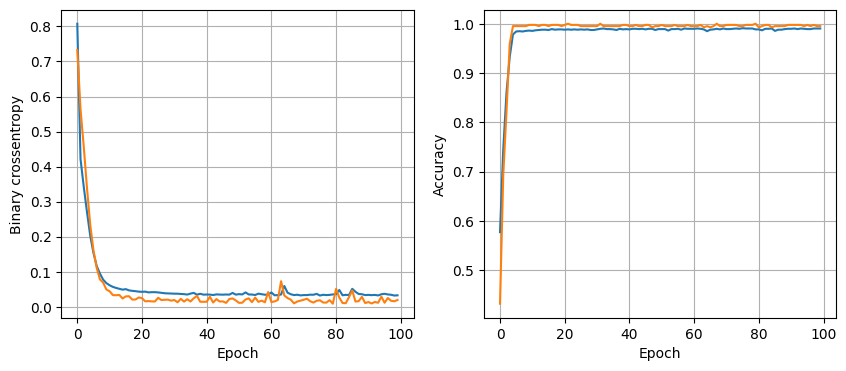

13/13 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9819
4 nodes, dropout 0, lr 0.005, batch size 64


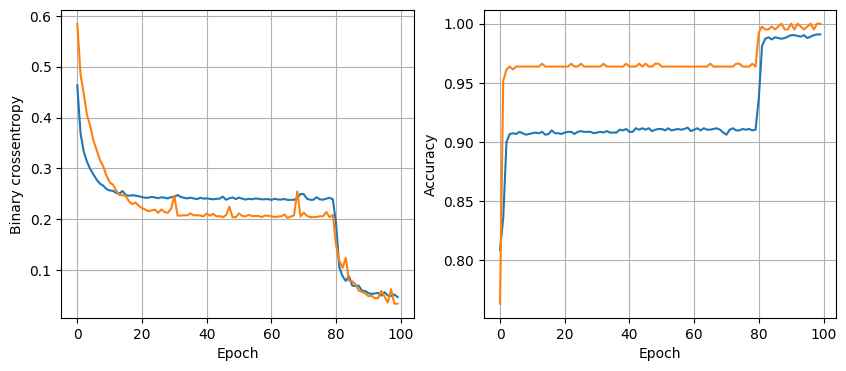

13/13 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9845
4 nodes, dropout 0, lr 0.005, batch size 128


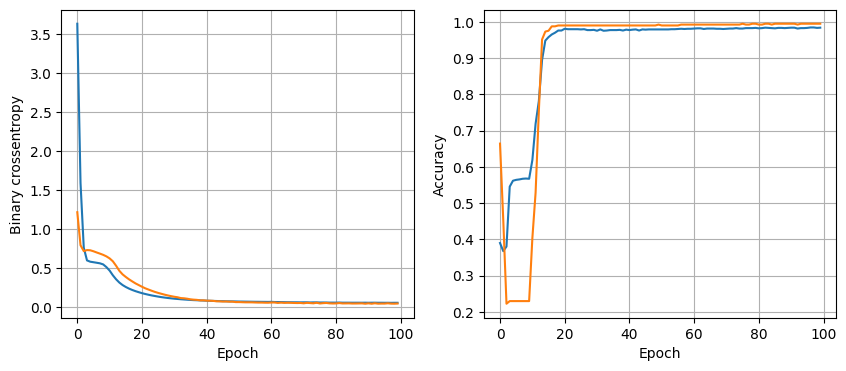

13/13 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.9716
4 nodes, dropout 0, lr 0.001, batch size 16


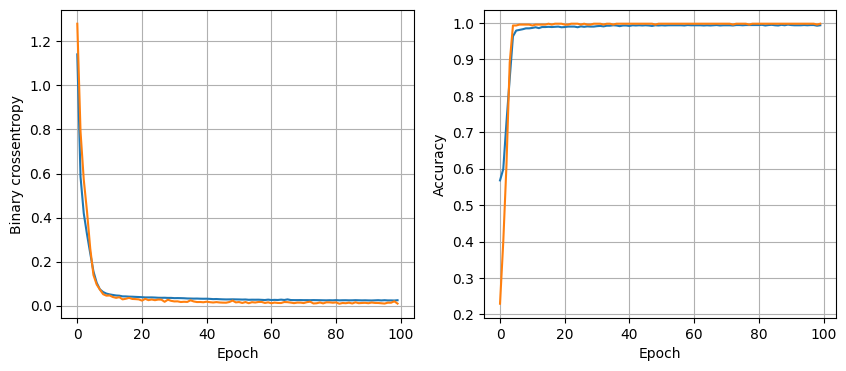

13/13 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9871
4 nodes, dropout 0, lr 0.001, batch size 32


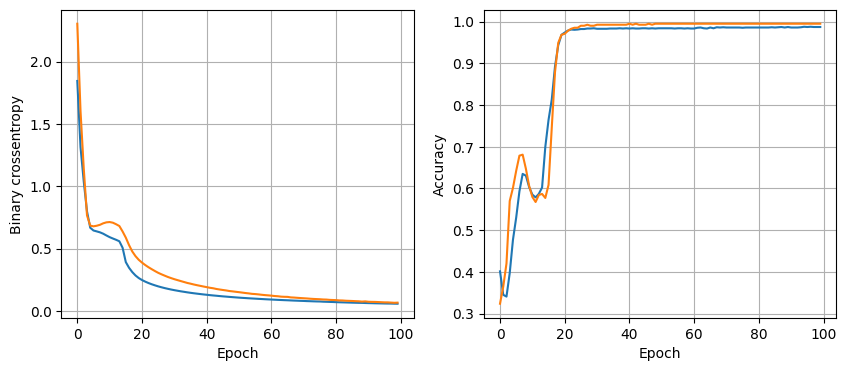

13/13 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9767
4 nodes, dropout 0, lr 0.001, batch size 64


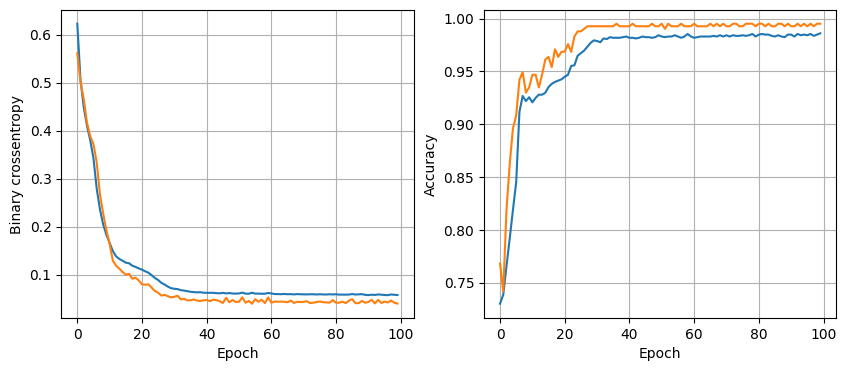

13/13 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9716
4 nodes, dropout 0, lr 0.001, batch size 128


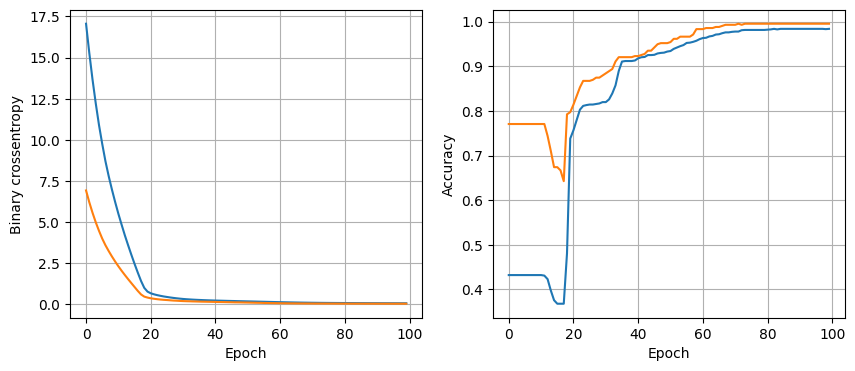

13/13 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9742
4 nodes, dropout 0.2, lr 0.01, batch size 16


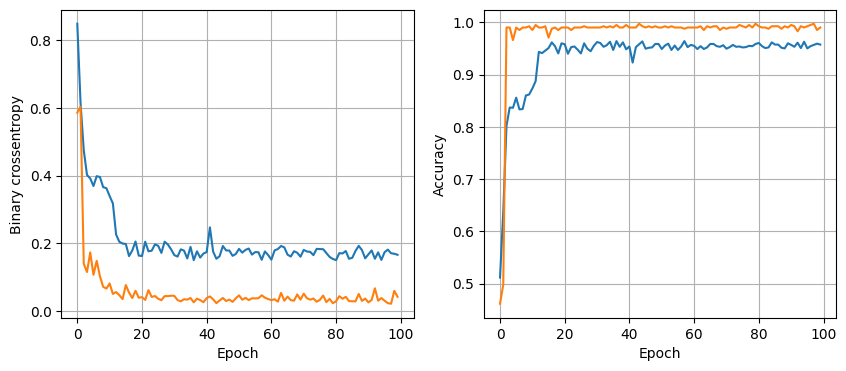

13/13 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9767
4 nodes, dropout 0.2, lr 0.01, batch size 32


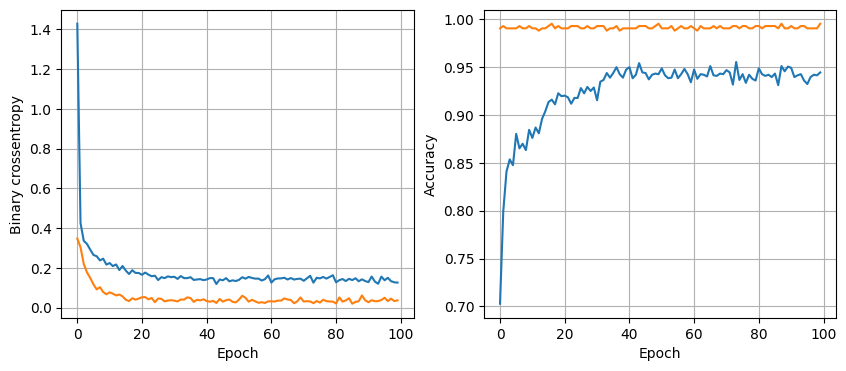

13/13 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9742
4 nodes, dropout 0.2, lr 0.01, batch size 64


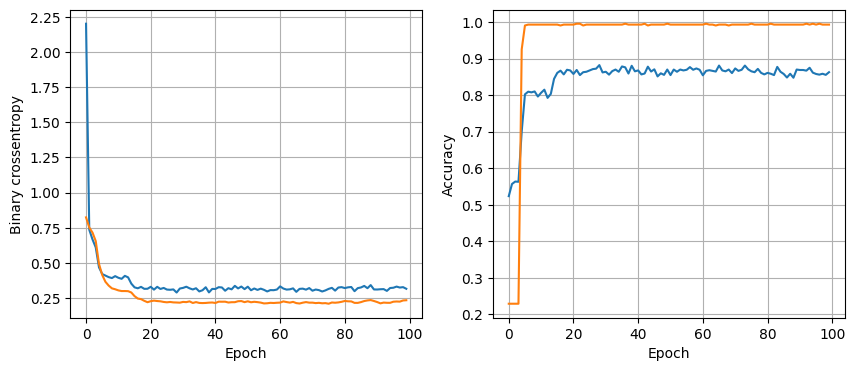

13/13 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9664
4 nodes, dropout 0.2, lr 0.01, batch size 128


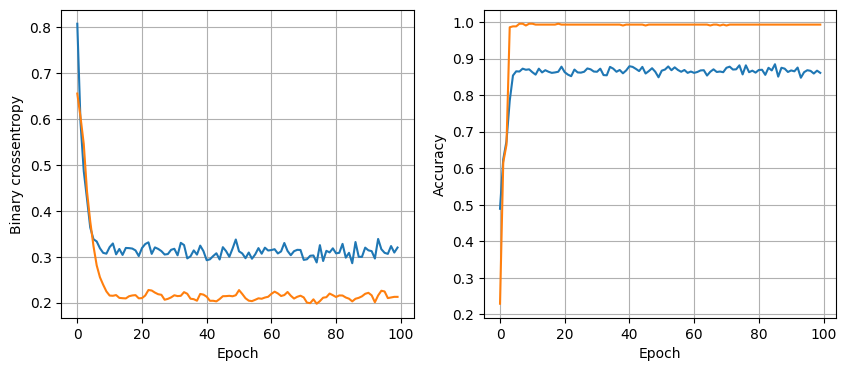

13/13 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9638
4 nodes, dropout 0.2, lr 0.005, batch size 16


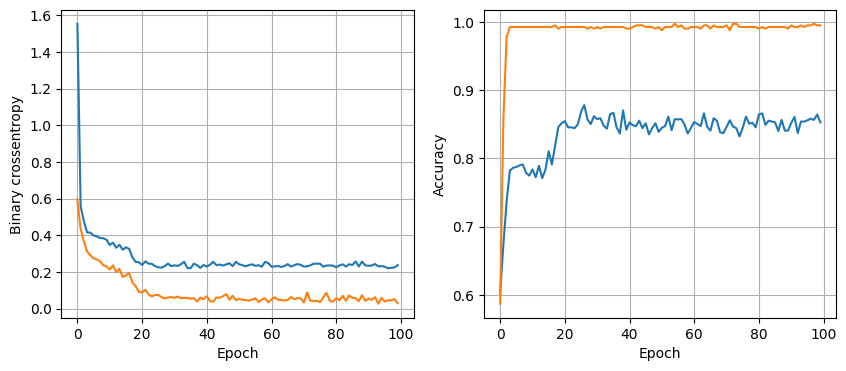

13/13 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9587
4 nodes, dropout 0.2, lr 0.005, batch size 32


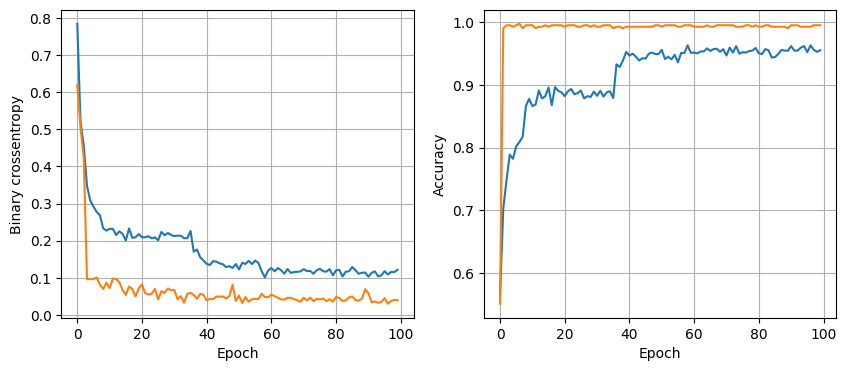

13/13 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9561
4 nodes, dropout 0.2, lr 0.005, batch size 64


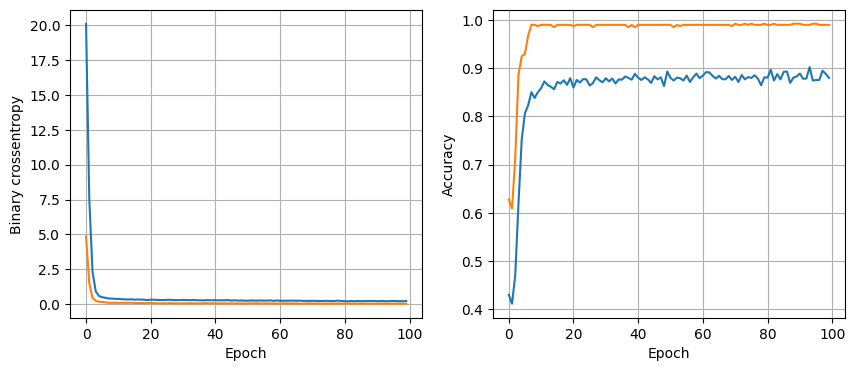

13/13 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9793
4 nodes, dropout 0.2, lr 0.005, batch size 128


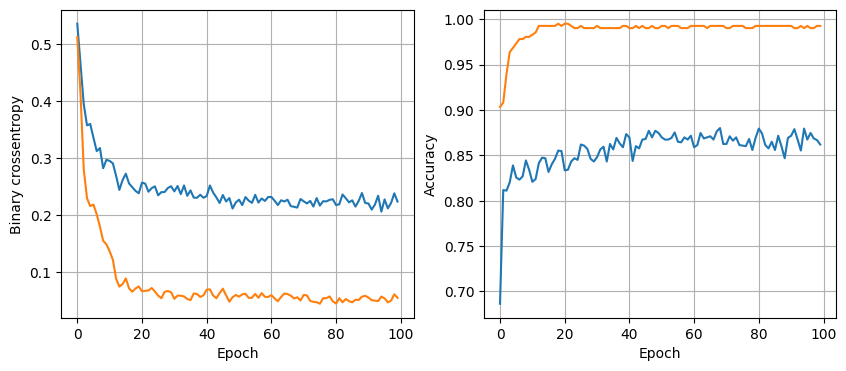

13/13 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9612
4 nodes, dropout 0.2, lr 0.001, batch size 16


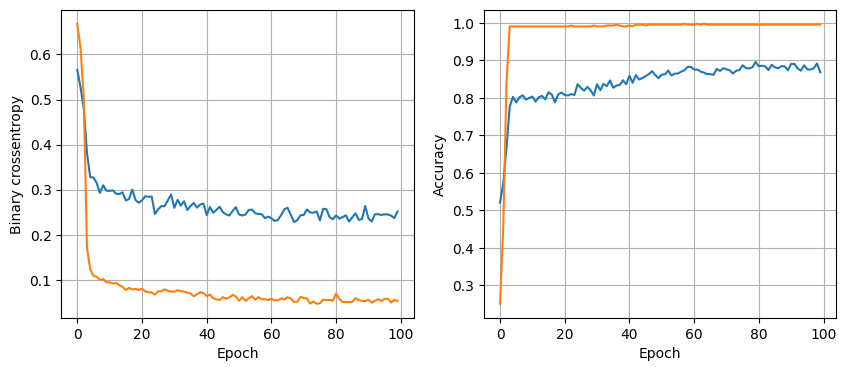

13/13 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9716
4 nodes, dropout 0.2, lr 0.001, batch size 32


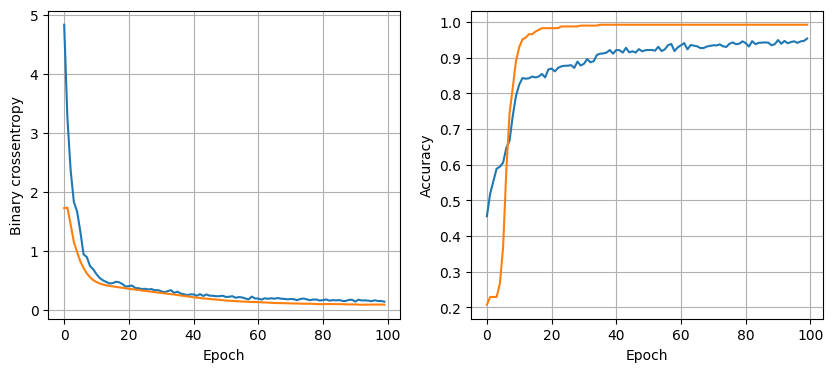

13/13 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.9690
4 nodes, dropout 0.2, lr 0.001, batch size 64


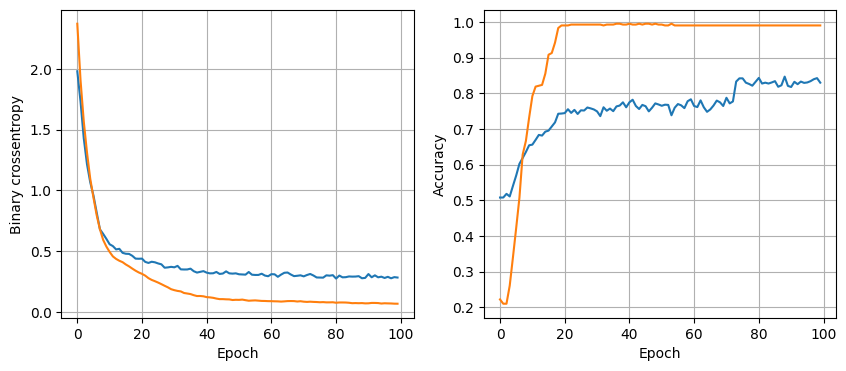

13/13 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9742
4 nodes, dropout 0.2, lr 0.001, batch size 128


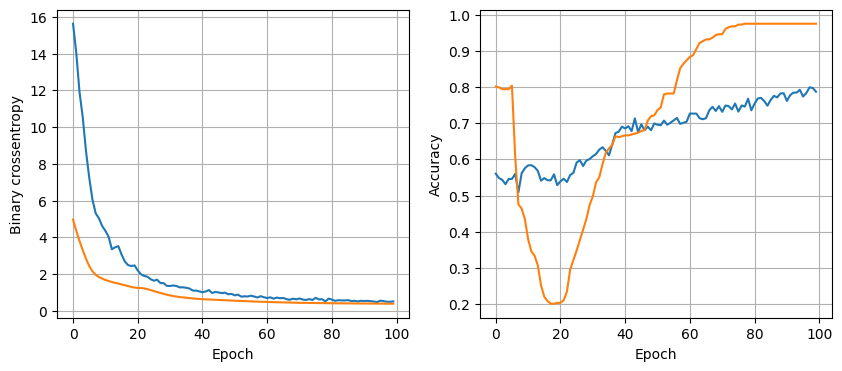

13/13 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.9018
8 nodes, dropout 0, lr 0.01, batch size 16


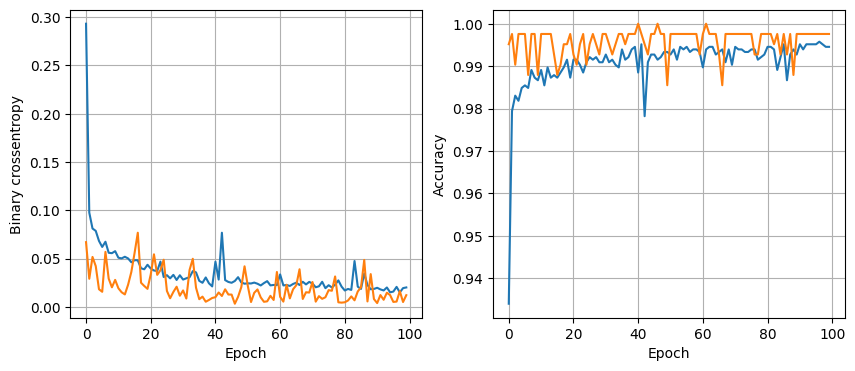

13/13 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.9871
8 nodes, dropout 0, lr 0.01, batch size 32


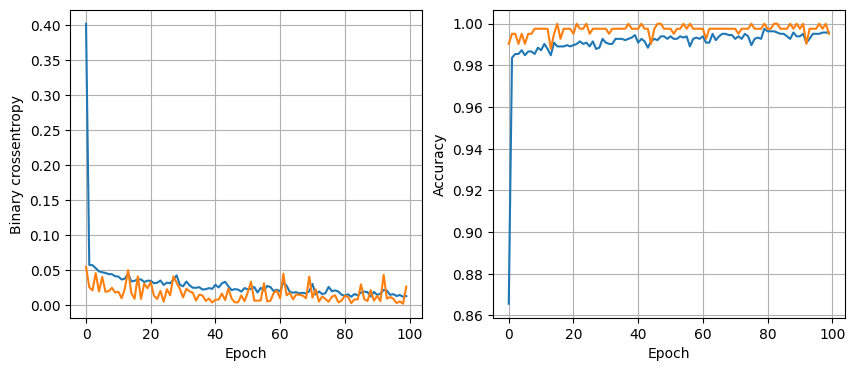

13/13 [==============================] - 0s 3ms/step - loss: 0.1435 - accuracy: 0.9871
8 nodes, dropout 0, lr 0.01, batch size 64


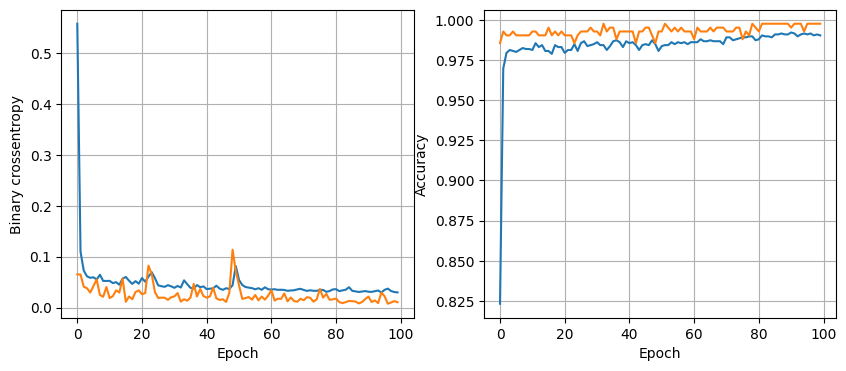

13/13 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 0.9845
8 nodes, dropout 0, lr 0.01, batch size 128


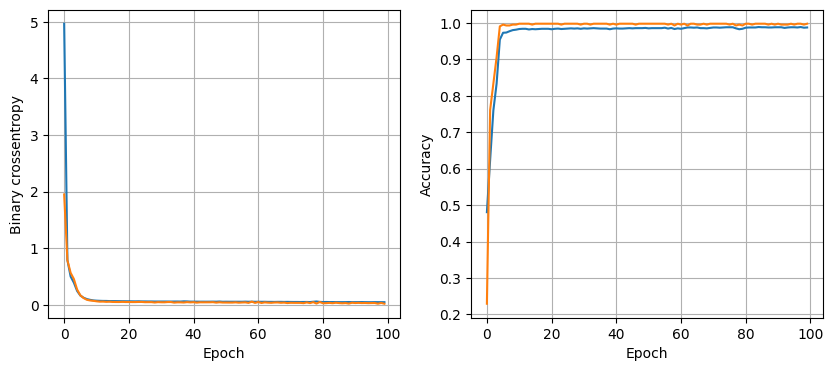

13/13 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9793
8 nodes, dropout 0, lr 0.005, batch size 16


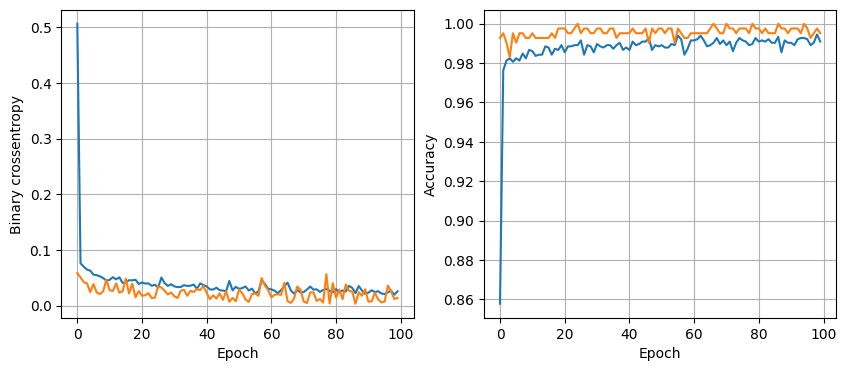

13/13 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9845
8 nodes, dropout 0, lr 0.005, batch size 32


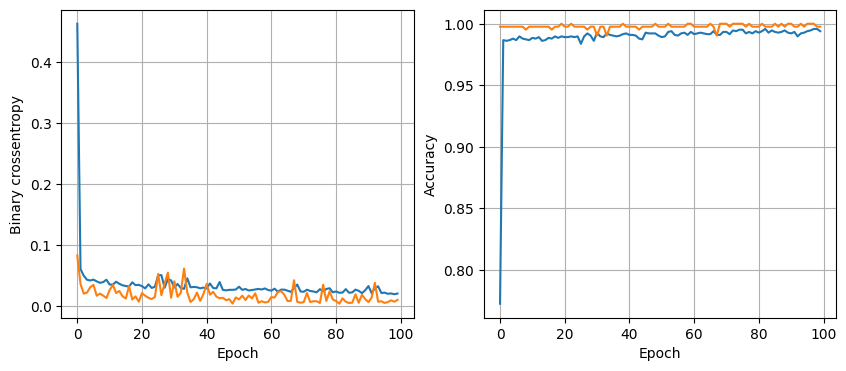

13/13 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9845
8 nodes, dropout 0, lr 0.005, batch size 64


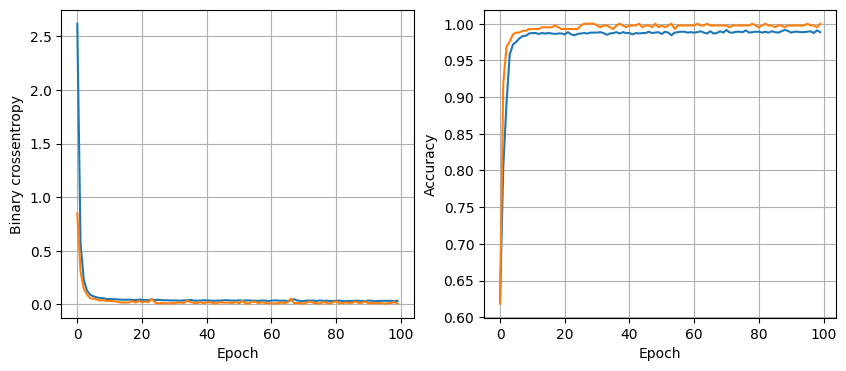

13/13 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9845
8 nodes, dropout 0, lr 0.005, batch size 128


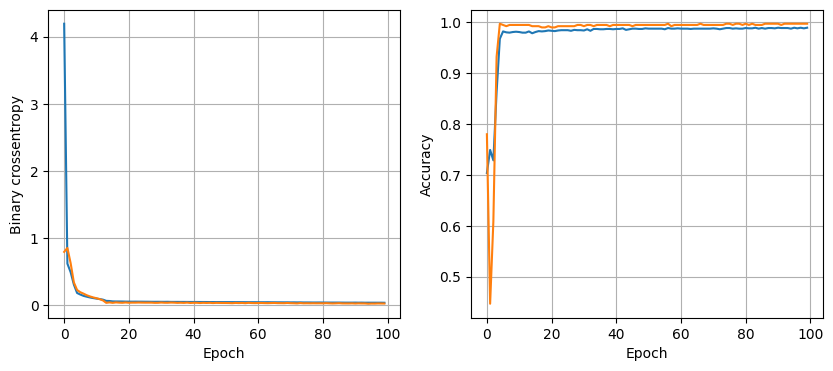

13/13 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9819
8 nodes, dropout 0, lr 0.001, batch size 16


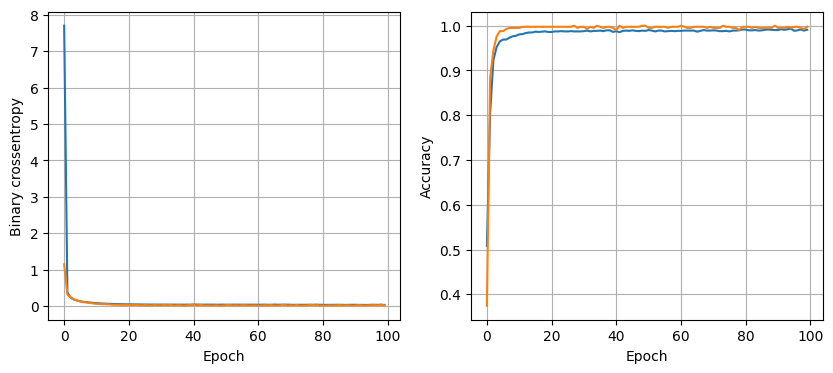

13/13 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9845
8 nodes, dropout 0, lr 0.001, batch size 32


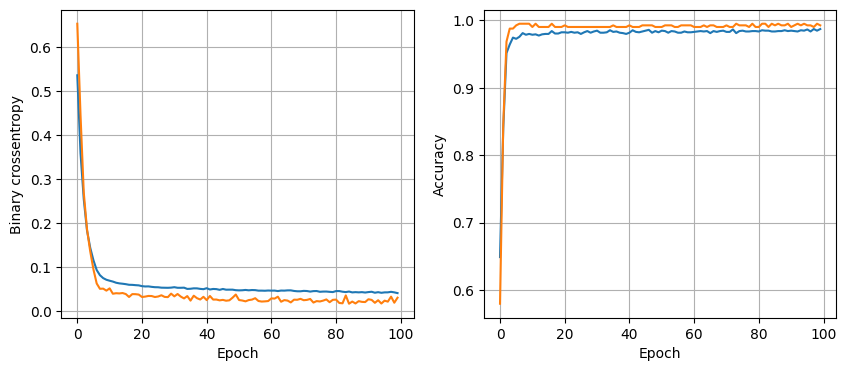

13/13 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9819
8 nodes, dropout 0, lr 0.001, batch size 64


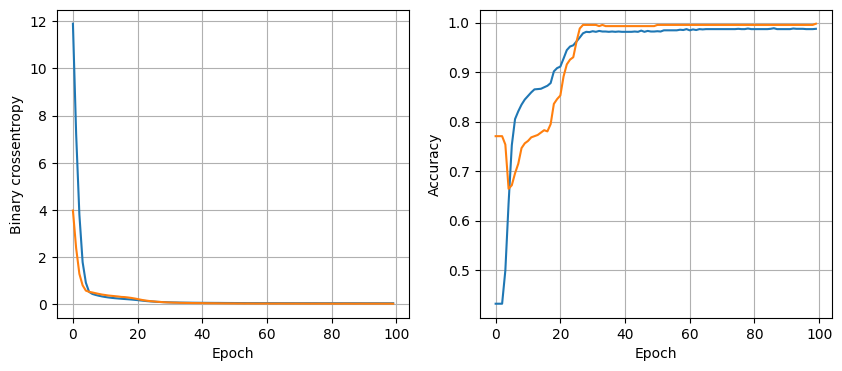

13/13 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9845
8 nodes, dropout 0, lr 0.001, batch size 128


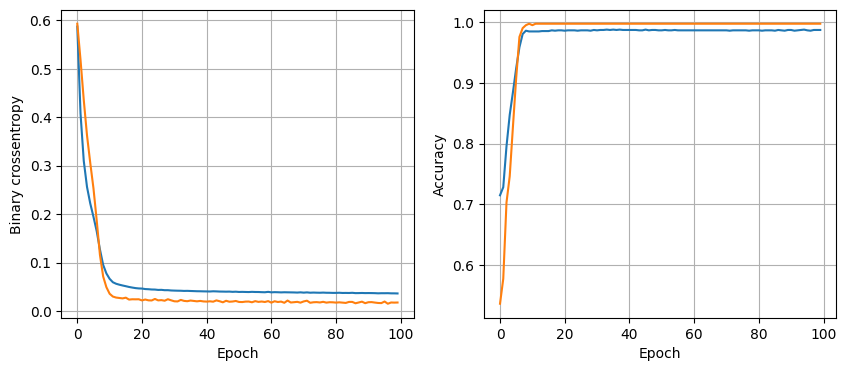

13/13 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9819
8 nodes, dropout 0.2, lr 0.01, batch size 16


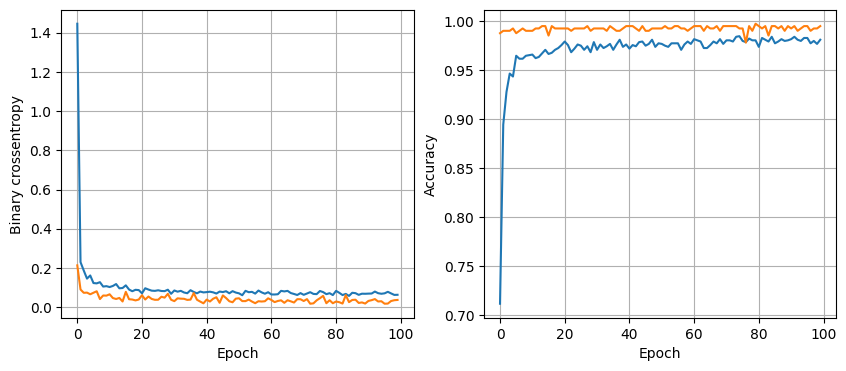

13/13 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9845
8 nodes, dropout 0.2, lr 0.01, batch size 32


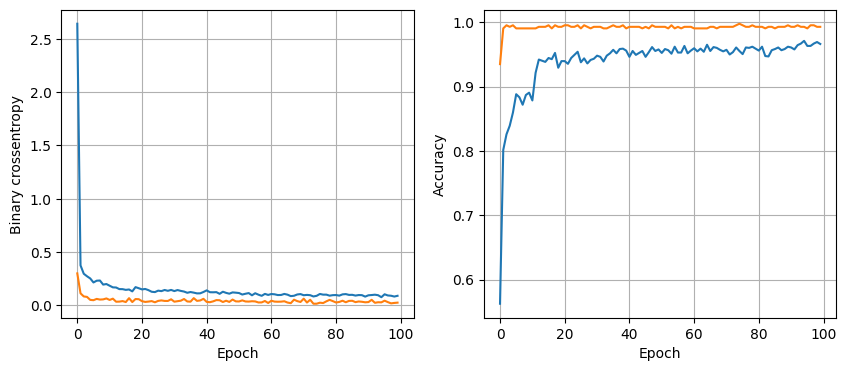

13/13 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9845
8 nodes, dropout 0.2, lr 0.01, batch size 64


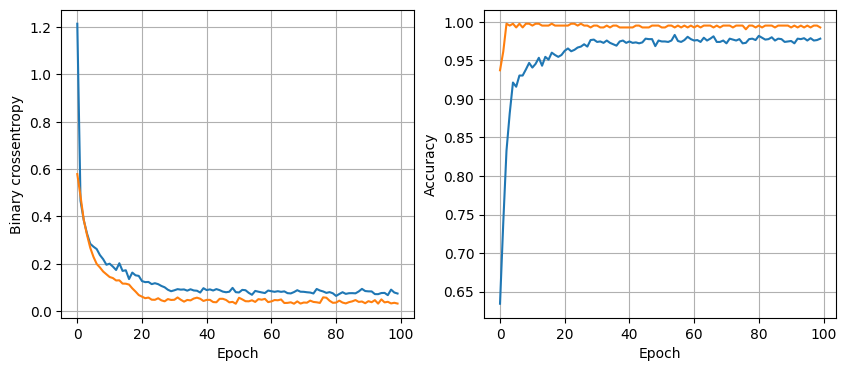

13/13 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9638
8 nodes, dropout 0.2, lr 0.01, batch size 128


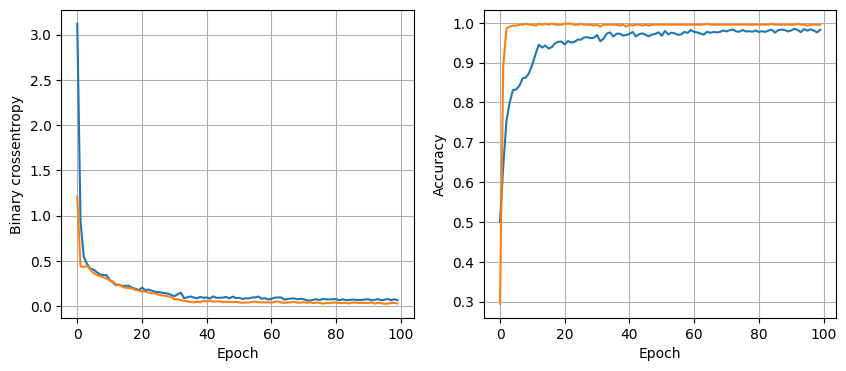

13/13 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.9819
8 nodes, dropout 0.2, lr 0.005, batch size 16


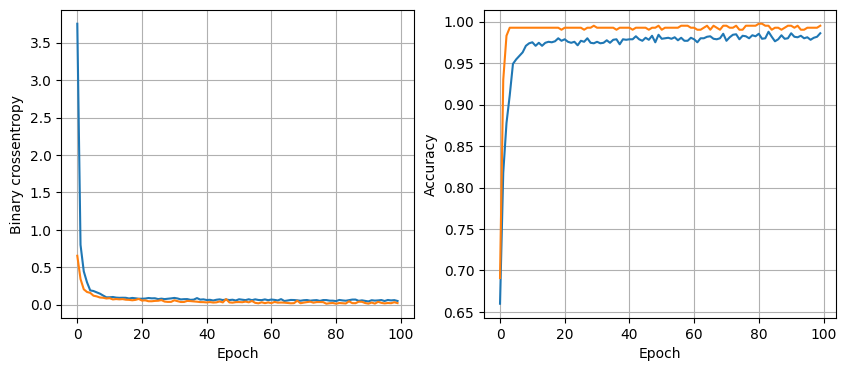

13/13 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9819
8 nodes, dropout 0.2, lr 0.005, batch size 32


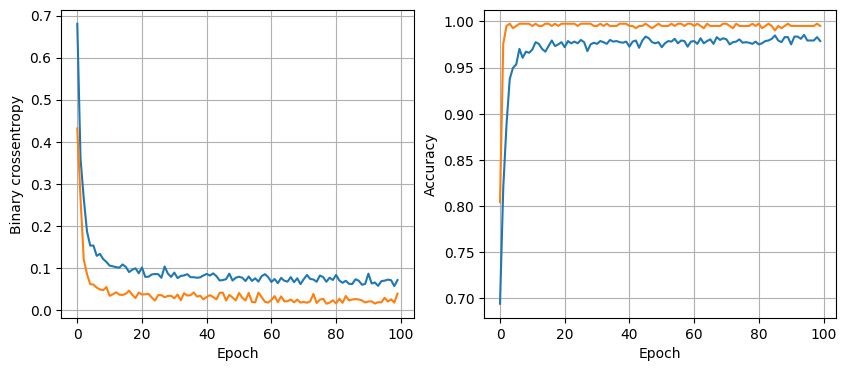

13/13 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9819
8 nodes, dropout 0.2, lr 0.005, batch size 64


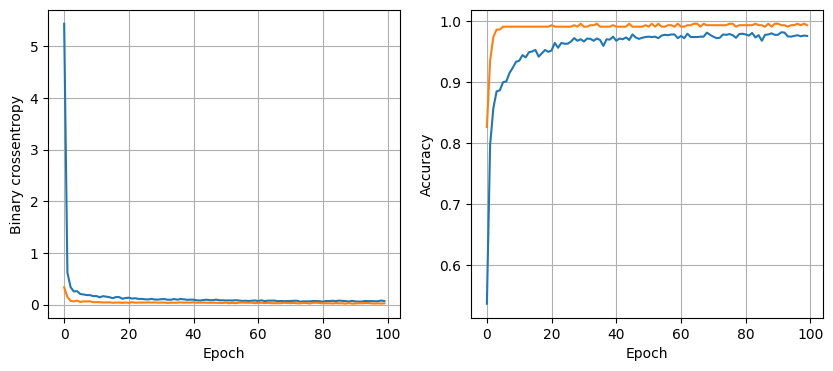

13/13 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9819
8 nodes, dropout 0.2, lr 0.005, batch size 128


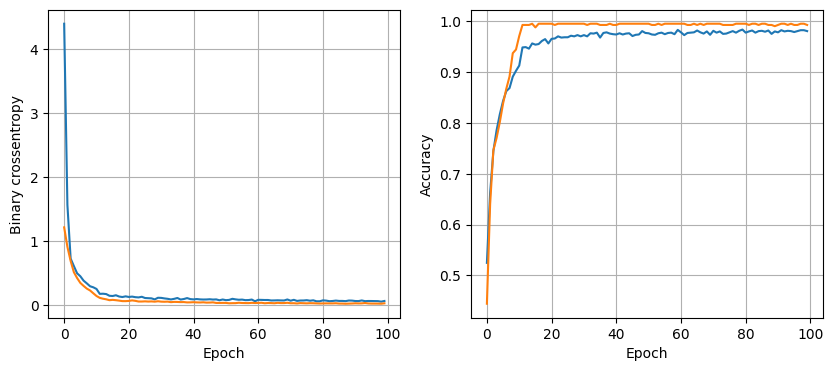

13/13 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9819
8 nodes, dropout 0.2, lr 0.001, batch size 16


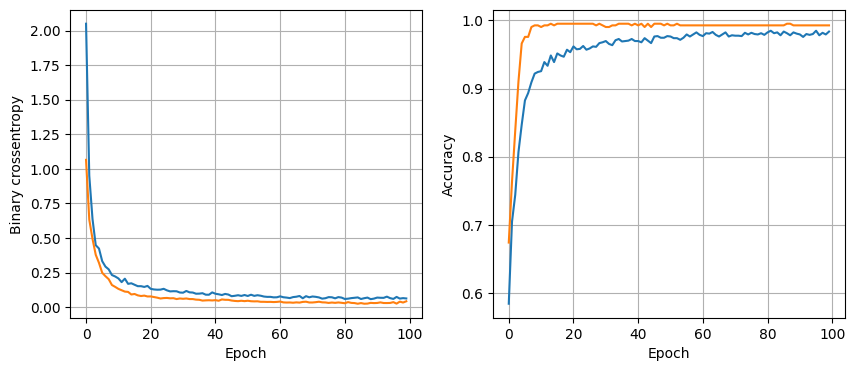

13/13 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9742
8 nodes, dropout 0.2, lr 0.001, batch size 32


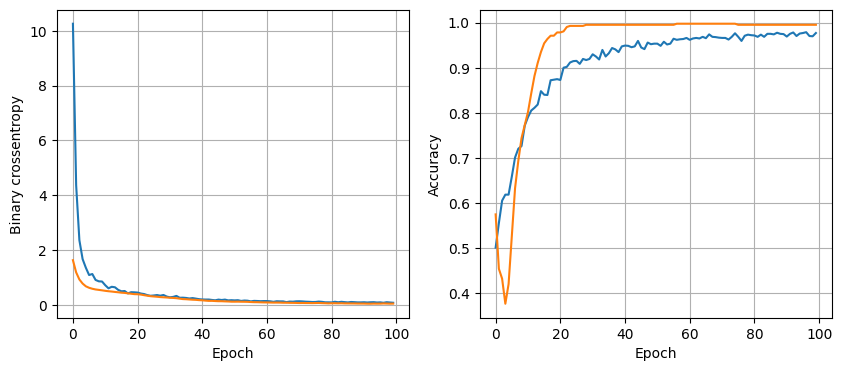

13/13 [==============================] - 0s 4ms/step - loss: 0.0628 - accuracy: 0.9767
8 nodes, dropout 0.2, lr 0.001, batch size 64


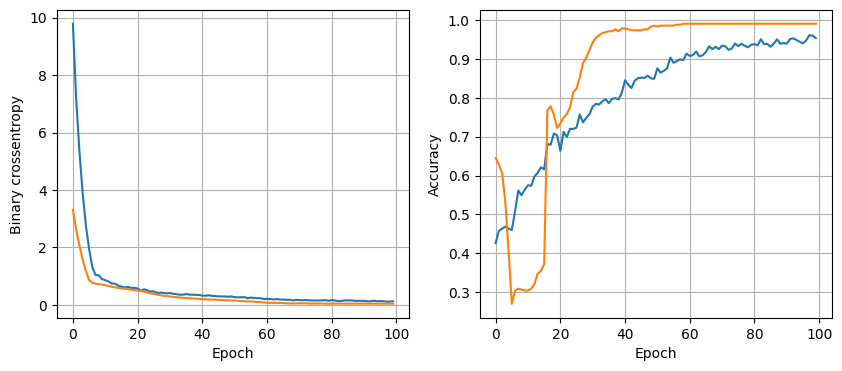

13/13 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9638
8 nodes, dropout 0.2, lr 0.001, batch size 128


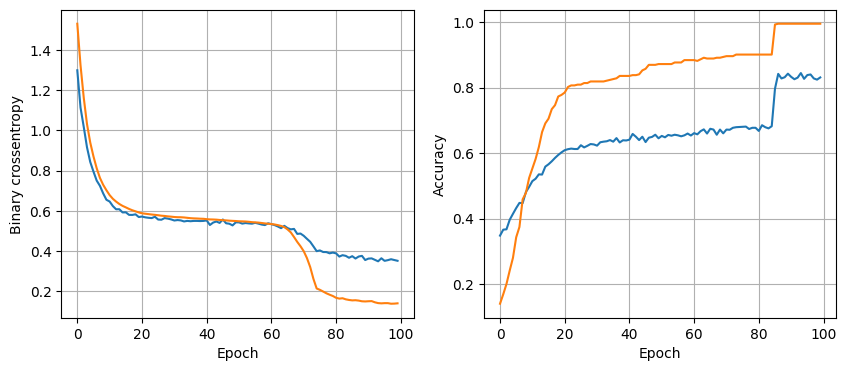

13/13 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.9690
16 nodes, dropout 0, lr 0.01, batch size 16


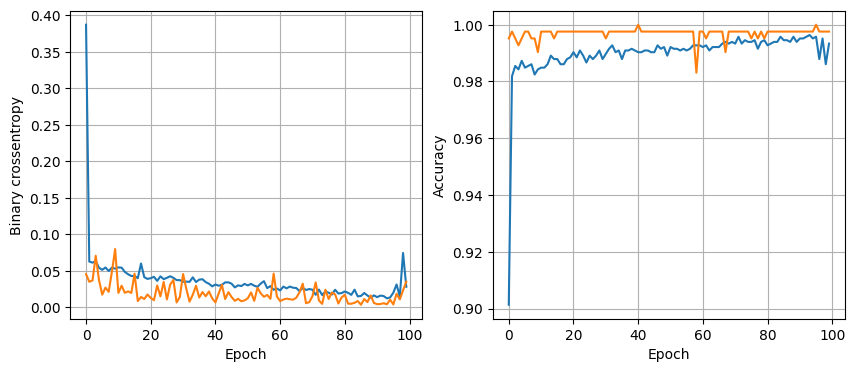

13/13 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9922
16 nodes, dropout 0, lr 0.01, batch size 32


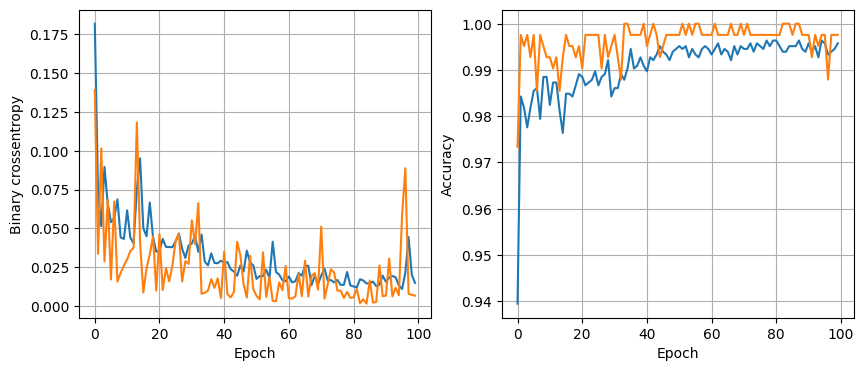

13/13 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.9897
16 nodes, dropout 0, lr 0.01, batch size 64


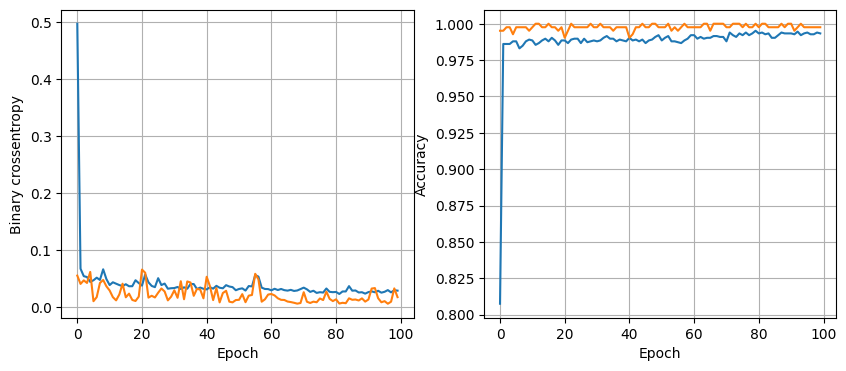

13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9845
16 nodes, dropout 0, lr 0.01, batch size 128


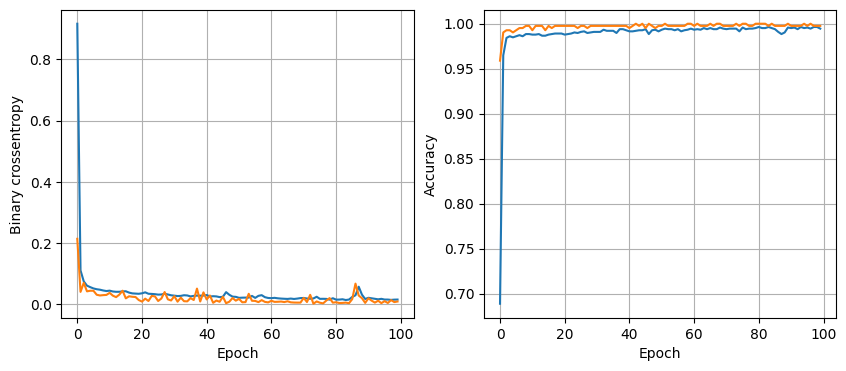

13/13 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9922
16 nodes, dropout 0, lr 0.005, batch size 16


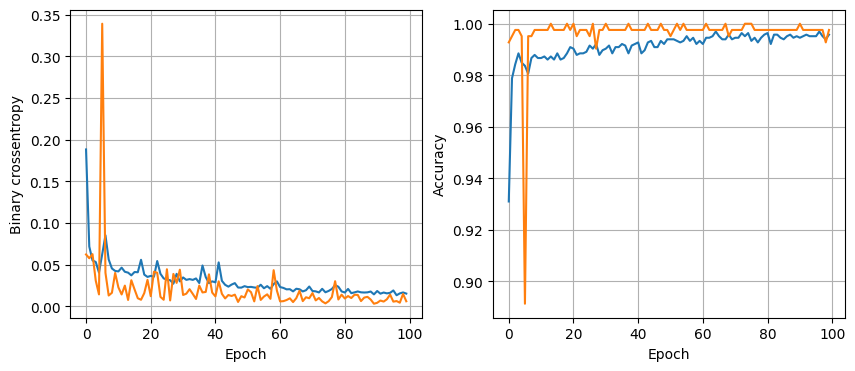

13/13 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9819
16 nodes, dropout 0, lr 0.005, batch size 32


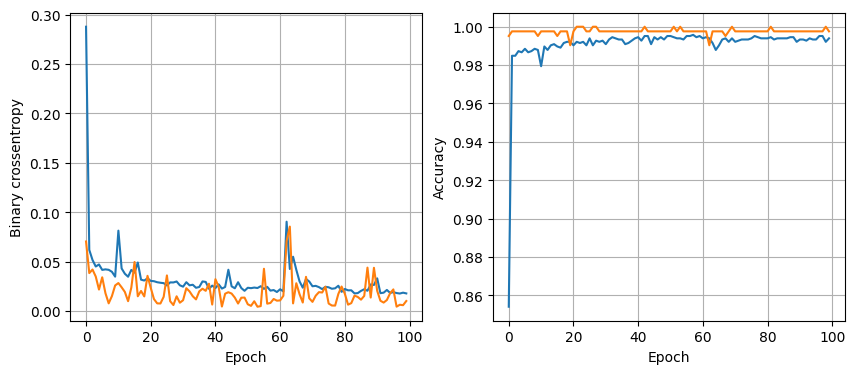

13/13 [==============================] - 0s 5ms/step - loss: 0.0841 - accuracy: 0.9845
16 nodes, dropout 0, lr 0.005, batch size 64


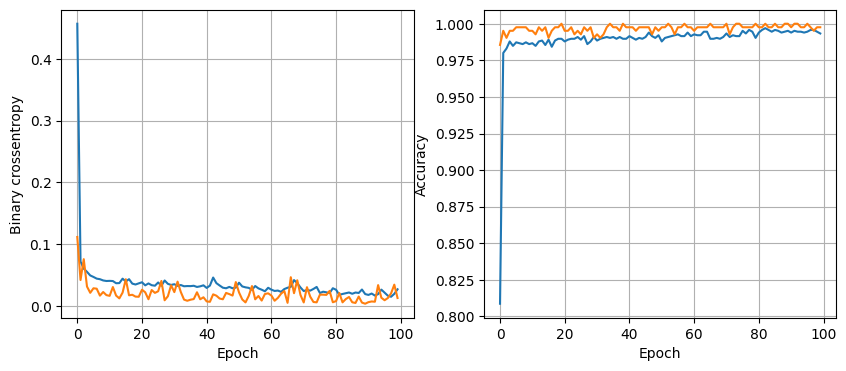

13/13 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9819
16 nodes, dropout 0, lr 0.005, batch size 128


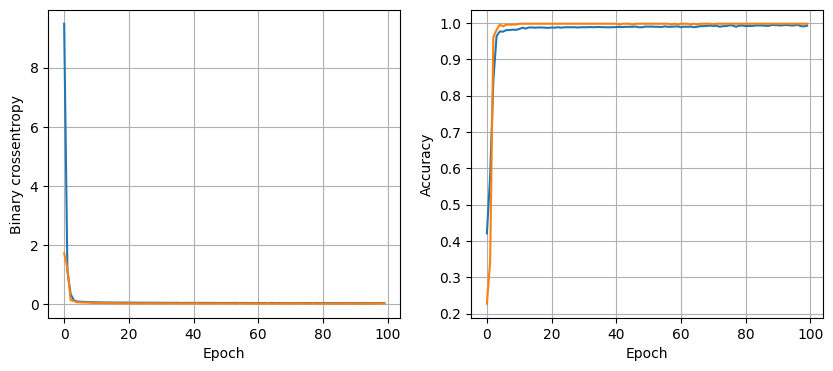

13/13 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9793
16 nodes, dropout 0, lr 0.001, batch size 16


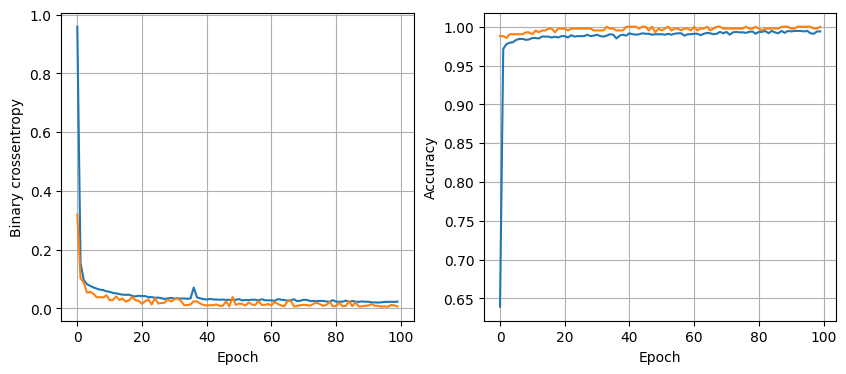

13/13 [==============================] - 0s 5ms/step - loss: 0.0715 - accuracy: 0.9845
16 nodes, dropout 0, lr 0.001, batch size 32


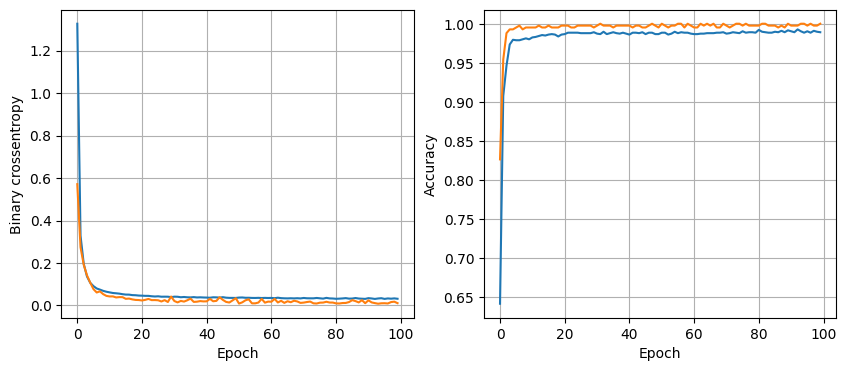

13/13 [==============================] - 0s 3ms/step - loss: 0.0586 - accuracy: 0.9845
16 nodes, dropout 0, lr 0.001, batch size 64


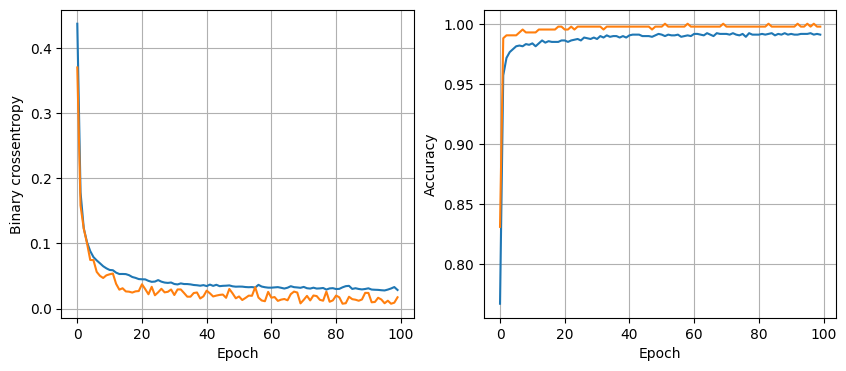

13/13 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9845
16 nodes, dropout 0, lr 0.001, batch size 128


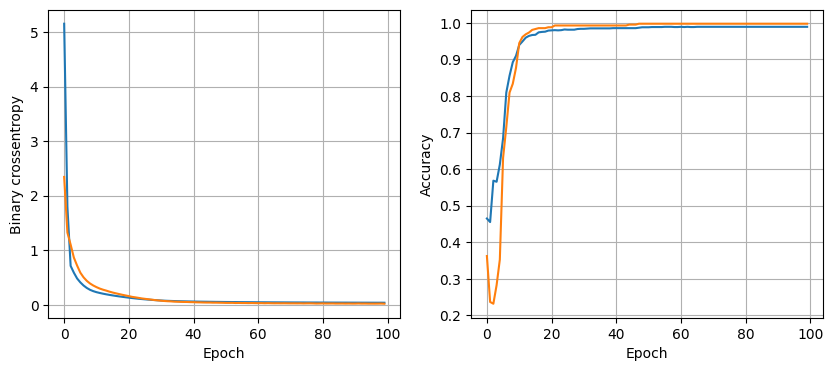

13/13 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9819
16 nodes, dropout 0.2, lr 0.01, batch size 16


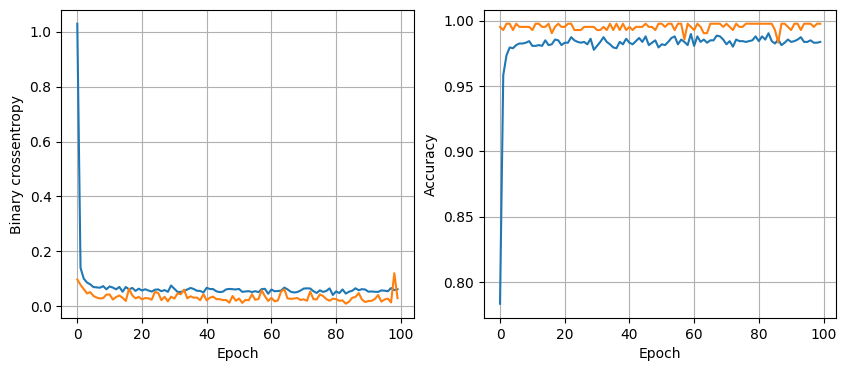

13/13 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9871
16 nodes, dropout 0.2, lr 0.01, batch size 32


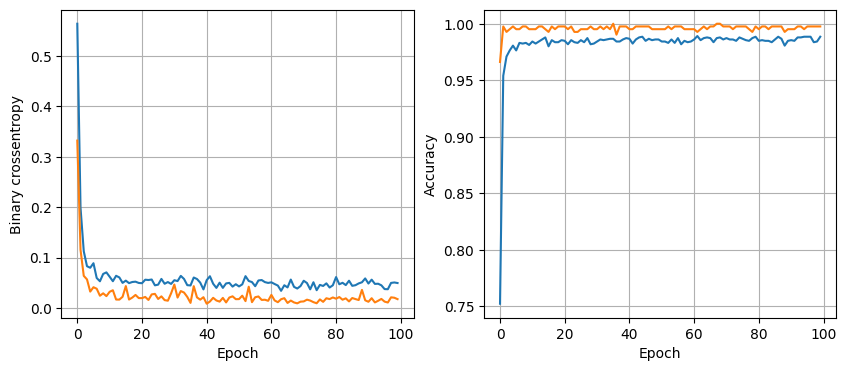

13/13 [==============================] - 0s 2ms/step - loss: 0.0877 - accuracy: 0.9871
16 nodes, dropout 0.2, lr 0.01, batch size 64


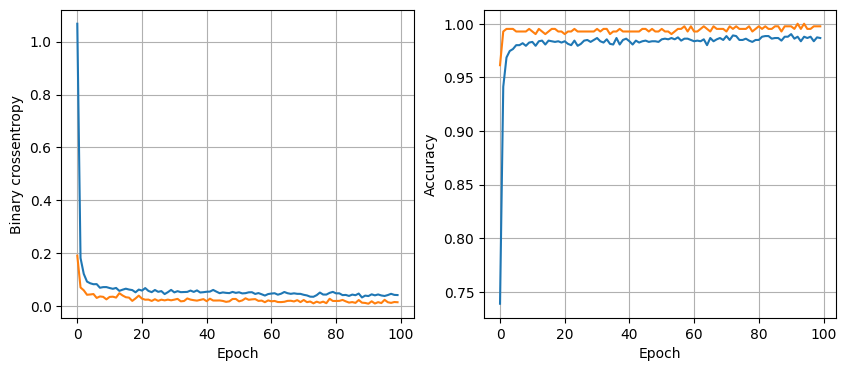

13/13 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9819
16 nodes, dropout 0.2, lr 0.01, batch size 128


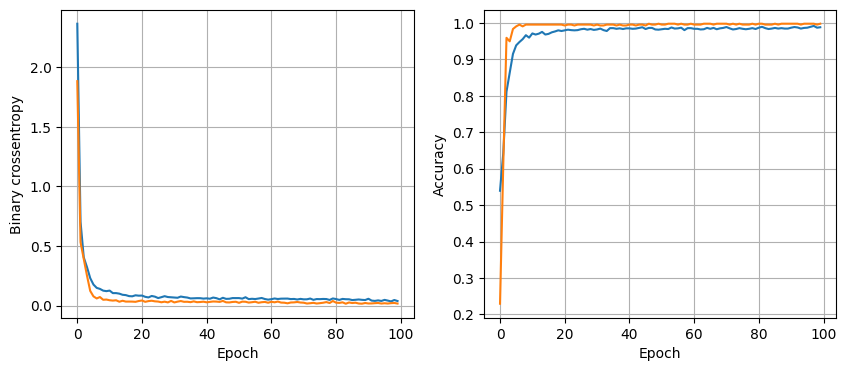

13/13 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9819
16 nodes, dropout 0.2, lr 0.005, batch size 16


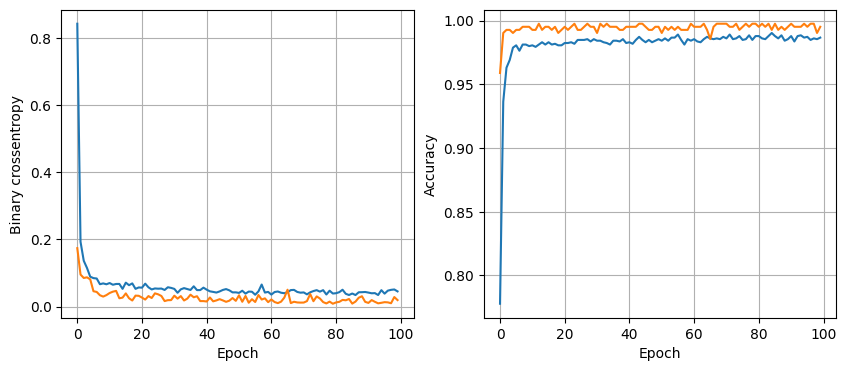

13/13 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 0.9793
16 nodes, dropout 0.2, lr 0.005, batch size 32


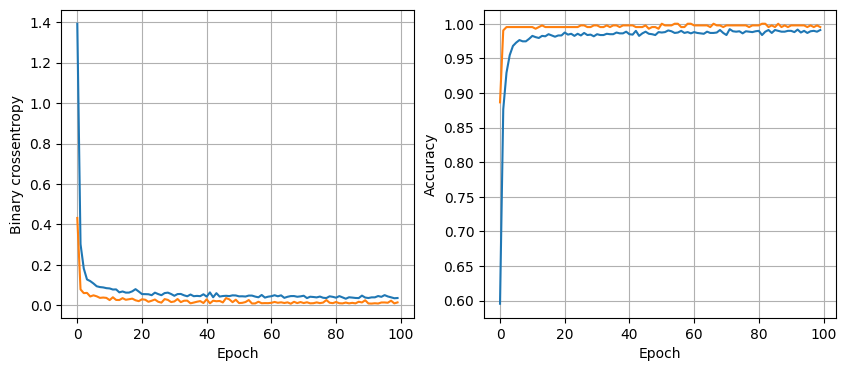

13/13 [==============================] - 0s 6ms/step - loss: 0.0547 - accuracy: 0.9845
16 nodes, dropout 0.2, lr 0.005, batch size 64


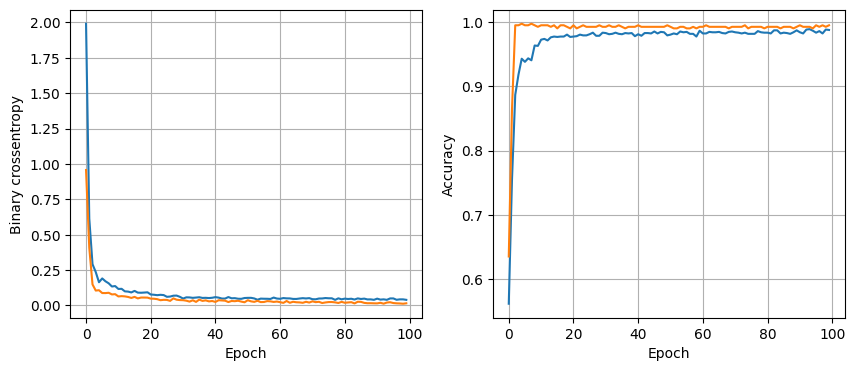

13/13 [==============================] - 0s 4ms/step - loss: 0.1100 - accuracy: 0.9845
16 nodes, dropout 0.2, lr 0.005, batch size 128


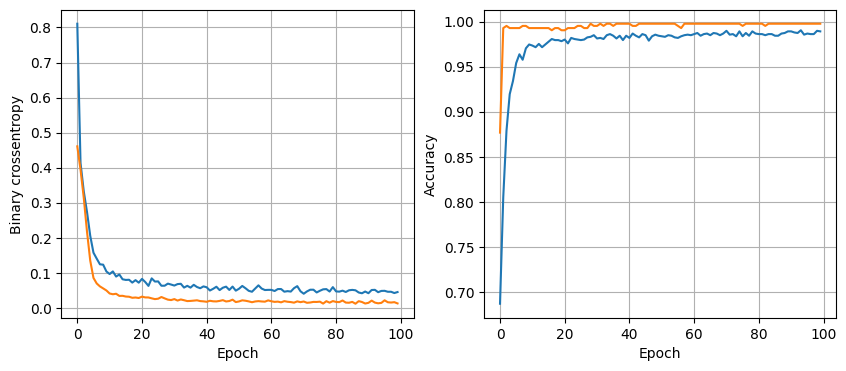

13/13 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9845
16 nodes, dropout 0.2, lr 0.001, batch size 16


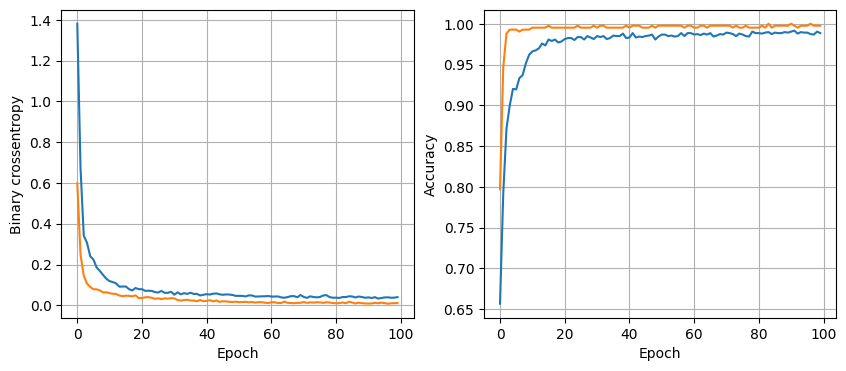

13/13 [==============================] - 0s 4ms/step - loss: 0.0723 - accuracy: 0.9845
16 nodes, dropout 0.2, lr 0.001, batch size 32


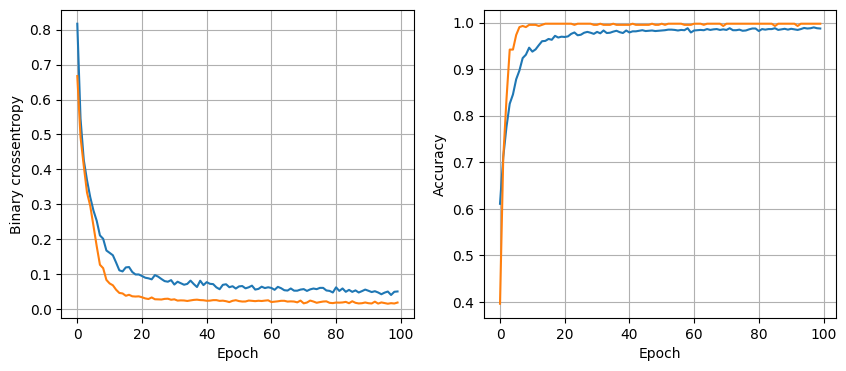

13/13 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9845
16 nodes, dropout 0.2, lr 0.001, batch size 64


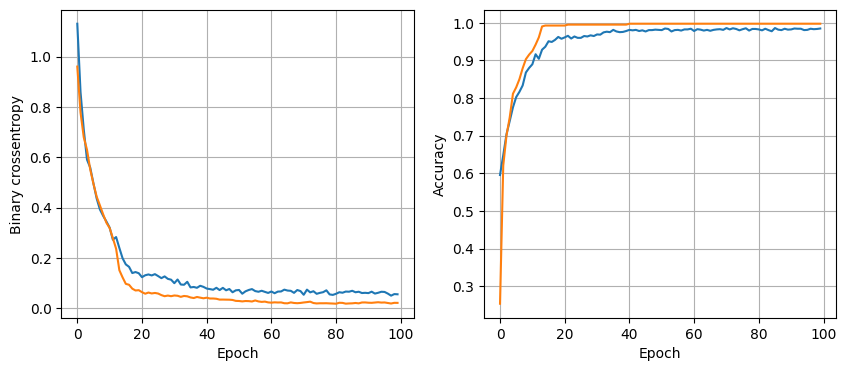

13/13 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9819
16 nodes, dropout 0.2, lr 0.001, batch size 128


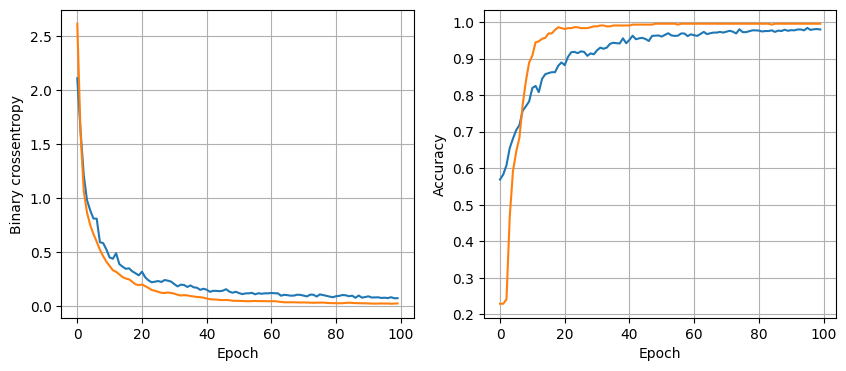

13/13 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9767
32 nodes, dropout 0, lr 0.01, batch size 16


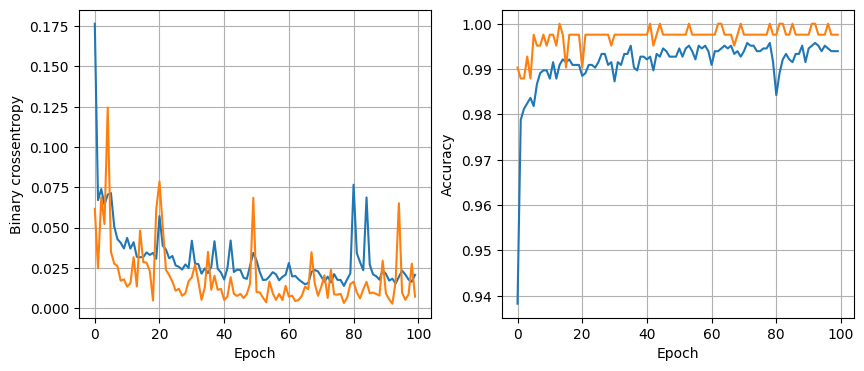

13/13 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9897
32 nodes, dropout 0, lr 0.01, batch size 32


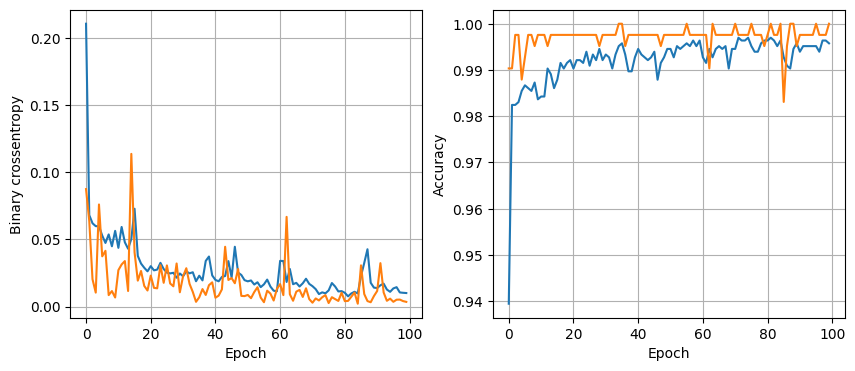

13/13 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.9871
32 nodes, dropout 0, lr 0.01, batch size 64


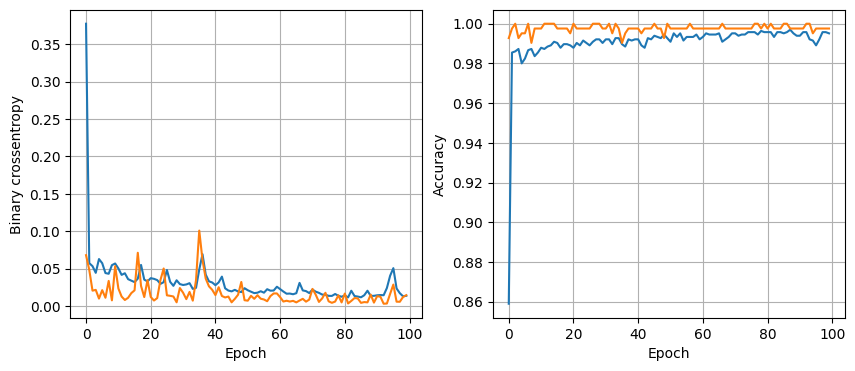

13/13 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9871
32 nodes, dropout 0, lr 0.01, batch size 128


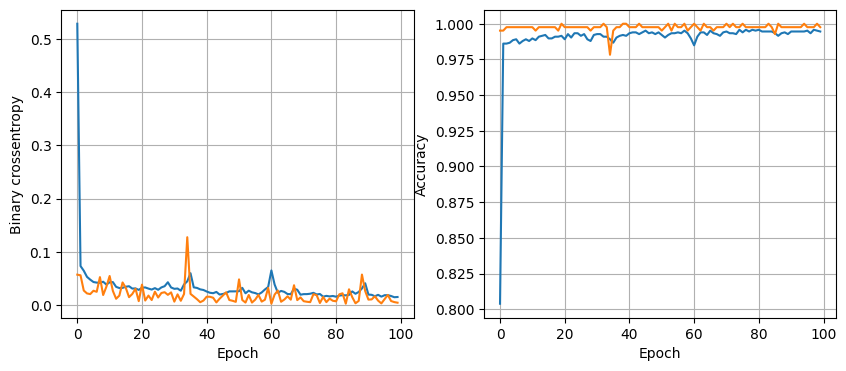

13/13 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9871
32 nodes, dropout 0, lr 0.005, batch size 16


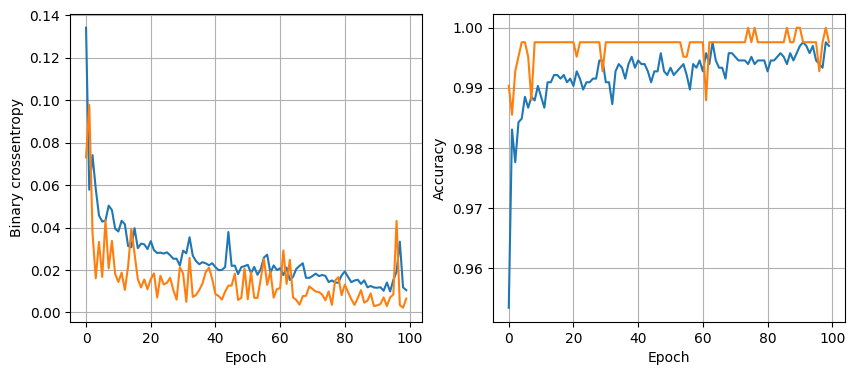

13/13 [==============================] - 0s 3ms/step - loss: 0.1813 - accuracy: 0.9897
32 nodes, dropout 0, lr 0.005, batch size 32


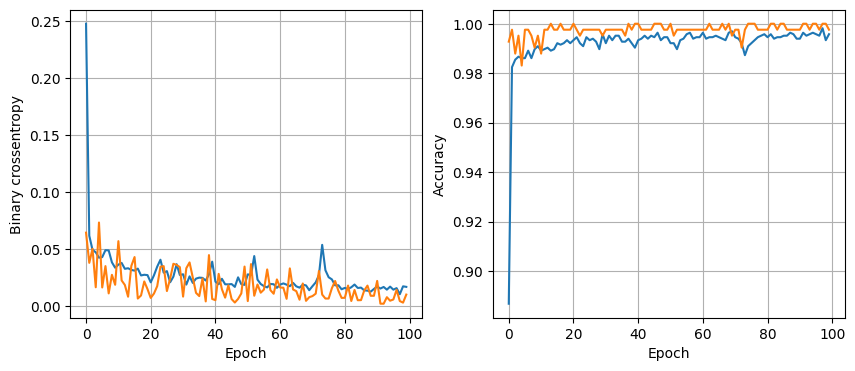

13/13 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9871
32 nodes, dropout 0, lr 0.005, batch size 64


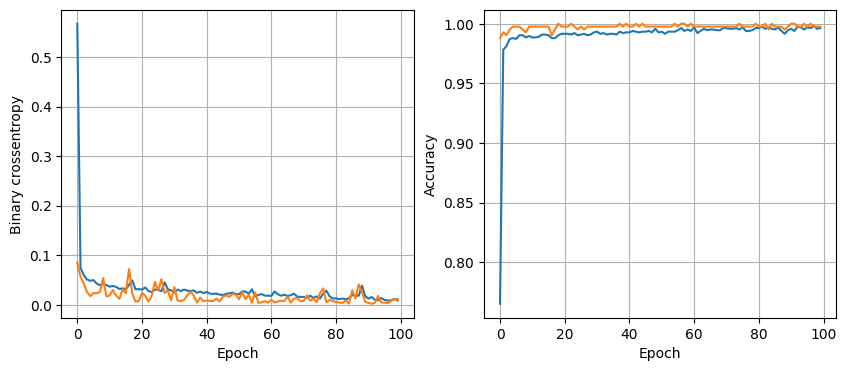

13/13 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9871
32 nodes, dropout 0, lr 0.005, batch size 128


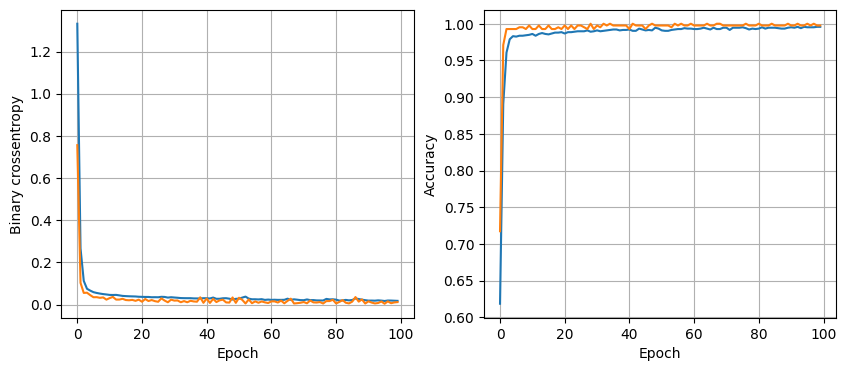

13/13 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9871
32 nodes, dropout 0, lr 0.001, batch size 16


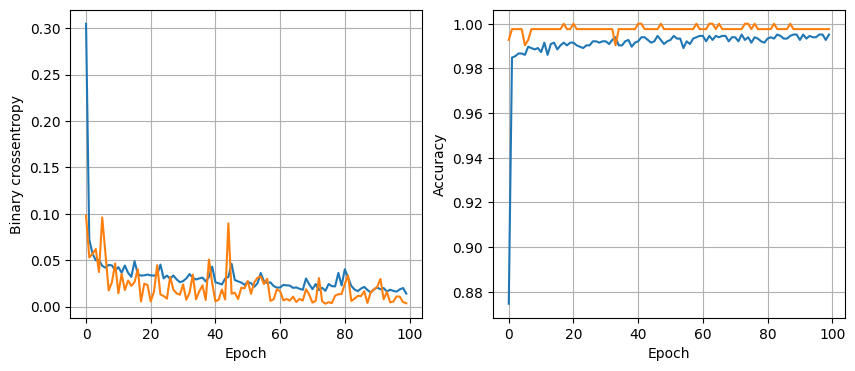

13/13 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.9871
32 nodes, dropout 0, lr 0.001, batch size 32


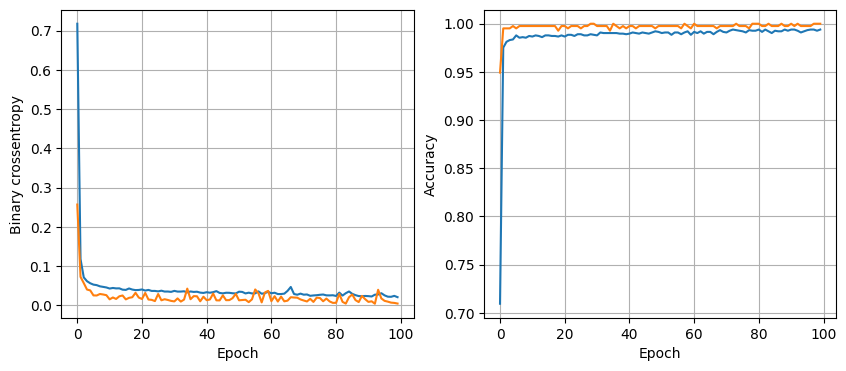

13/13 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9819
32 nodes, dropout 0, lr 0.001, batch size 64


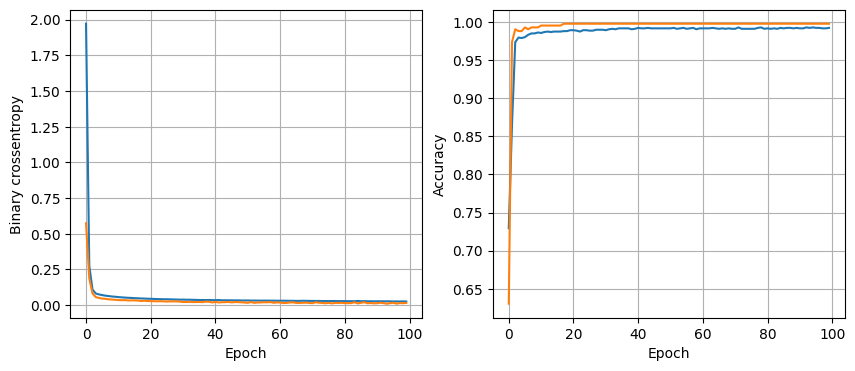

13/13 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9845
32 nodes, dropout 0, lr 0.001, batch size 128


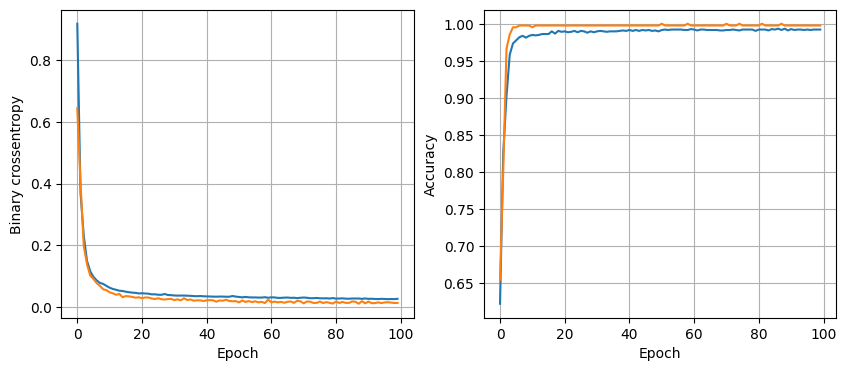

13/13 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9871
32 nodes, dropout 0.2, lr 0.01, batch size 16


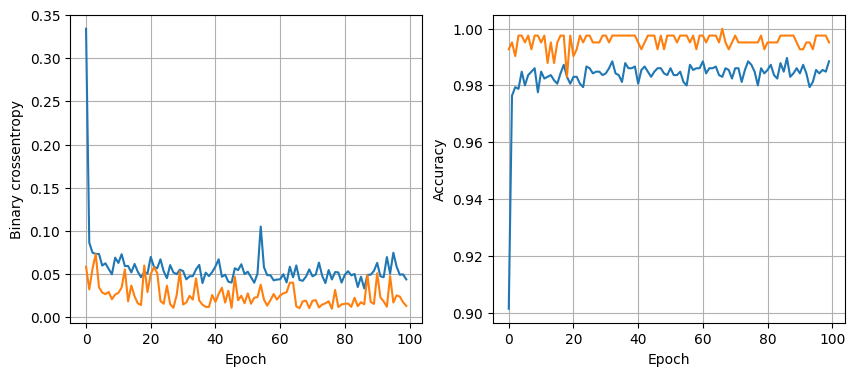

13/13 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9767
32 nodes, dropout 0.2, lr 0.01, batch size 32


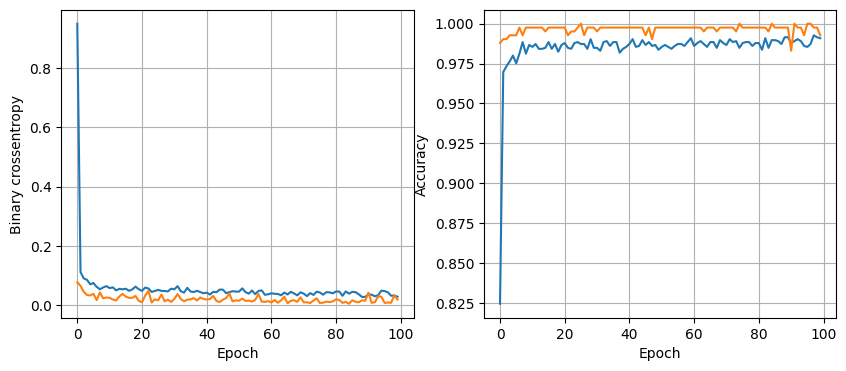

13/13 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9845
32 nodes, dropout 0.2, lr 0.01, batch size 64


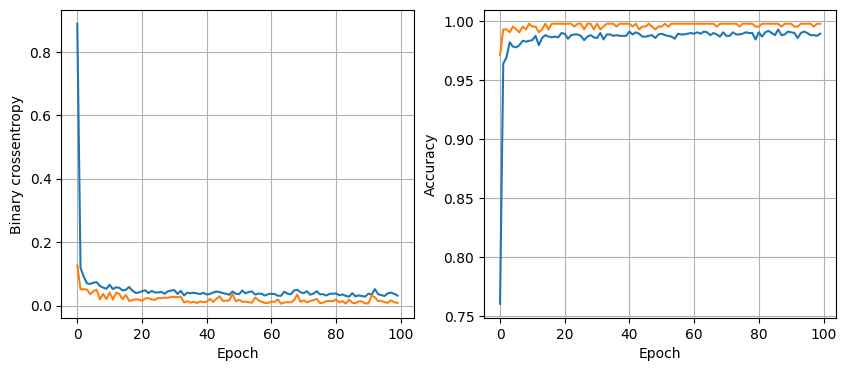

13/13 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9845
32 nodes, dropout 0.2, lr 0.01, batch size 128


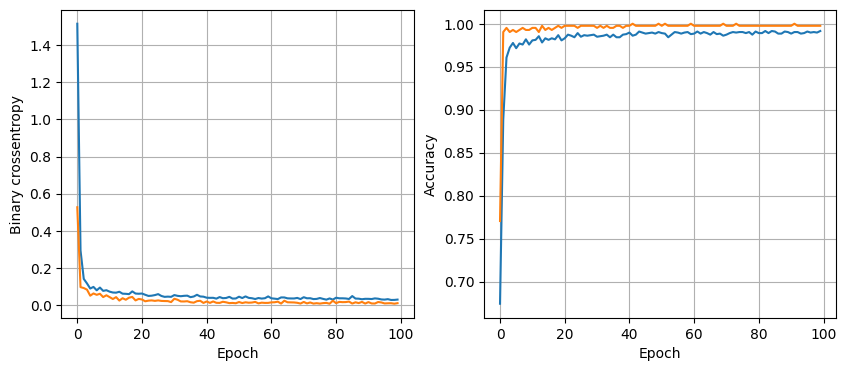

13/13 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9845
32 nodes, dropout 0.2, lr 0.005, batch size 16


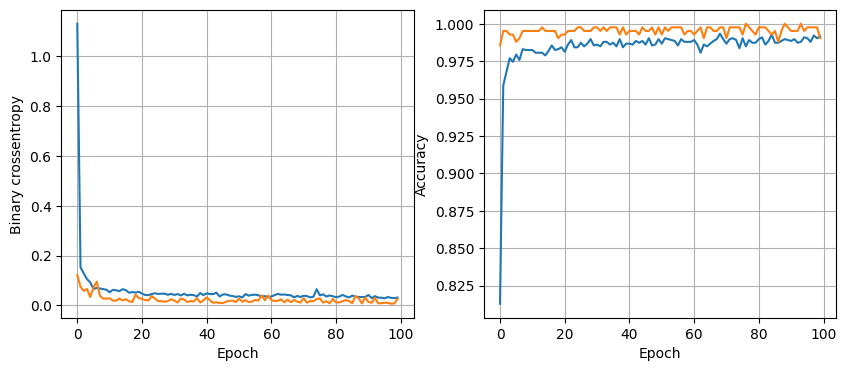

13/13 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9716
32 nodes, dropout 0.2, lr 0.005, batch size 32


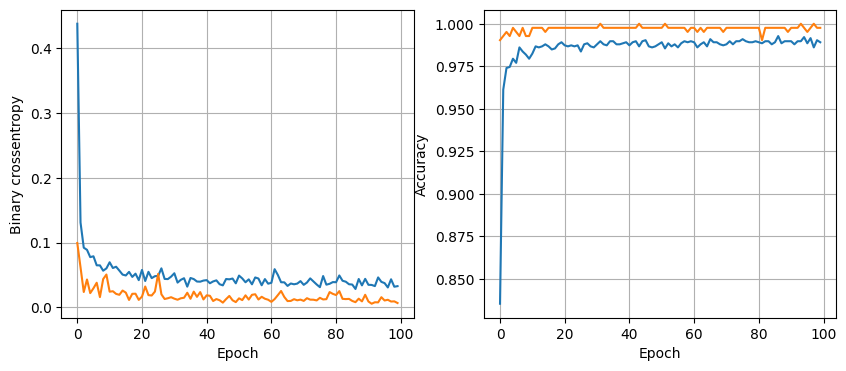

13/13 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9871
32 nodes, dropout 0.2, lr 0.005, batch size 64


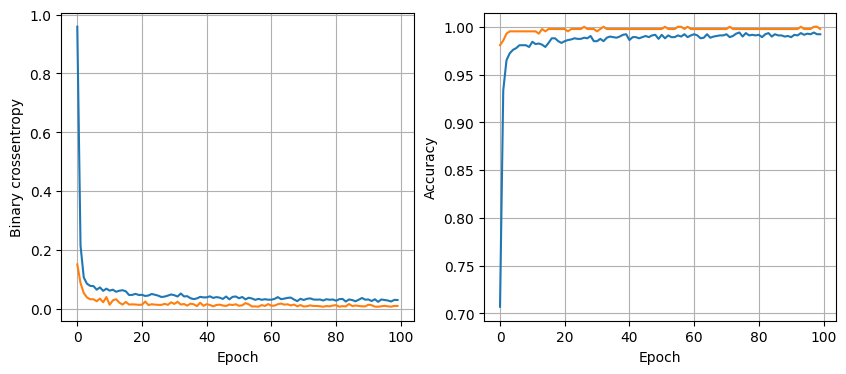

13/13 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9871
32 nodes, dropout 0.2, lr 0.005, batch size 128


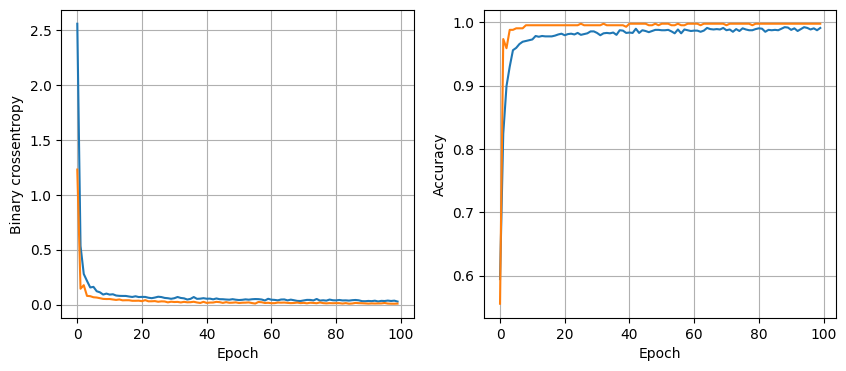

13/13 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9845
32 nodes, dropout 0.2, lr 0.001, batch size 16


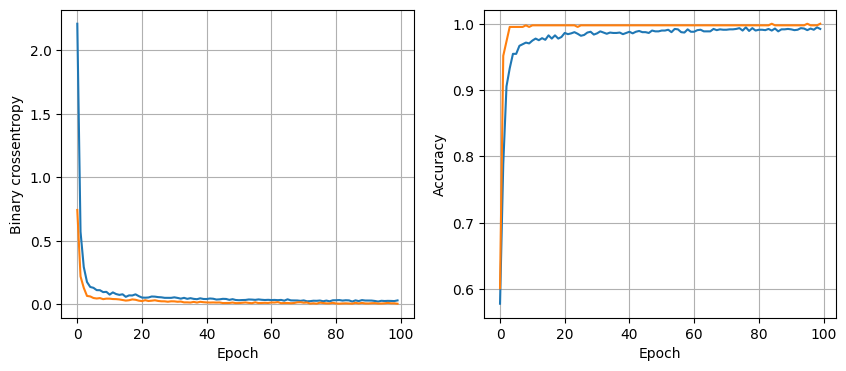

13/13 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.9871
32 nodes, dropout 0.2, lr 0.001, batch size 32


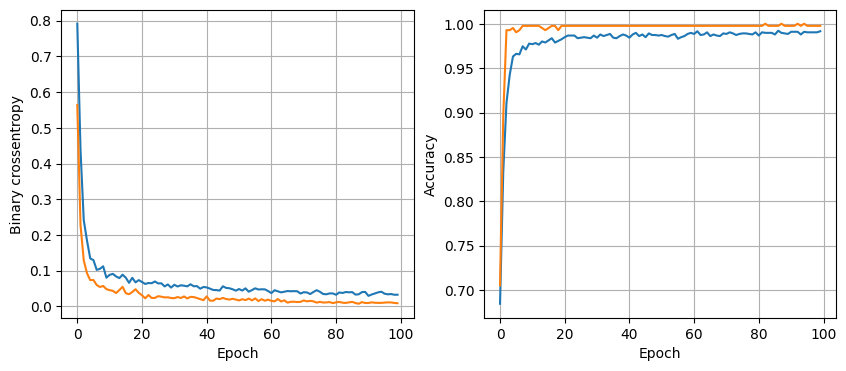

13/13 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9871
32 nodes, dropout 0.2, lr 0.001, batch size 64


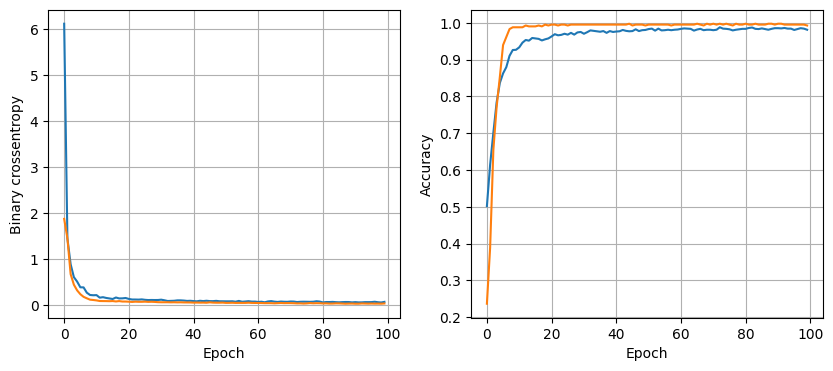

13/13 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9819
32 nodes, dropout 0.2, lr 0.001, batch size 128


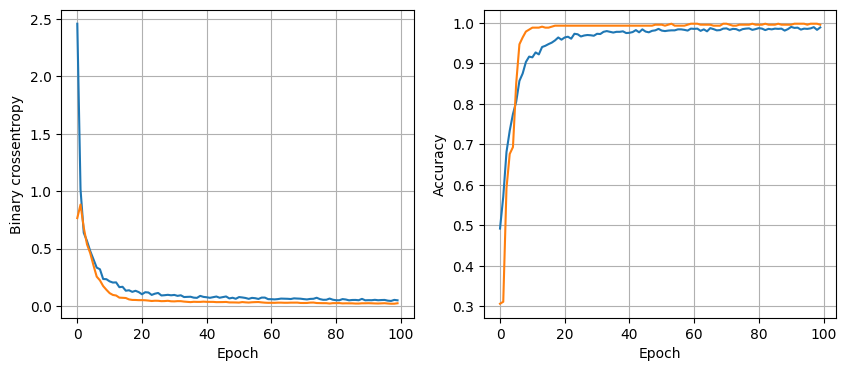

13/13 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9871
64 nodes, dropout 0, lr 0.01, batch size 16


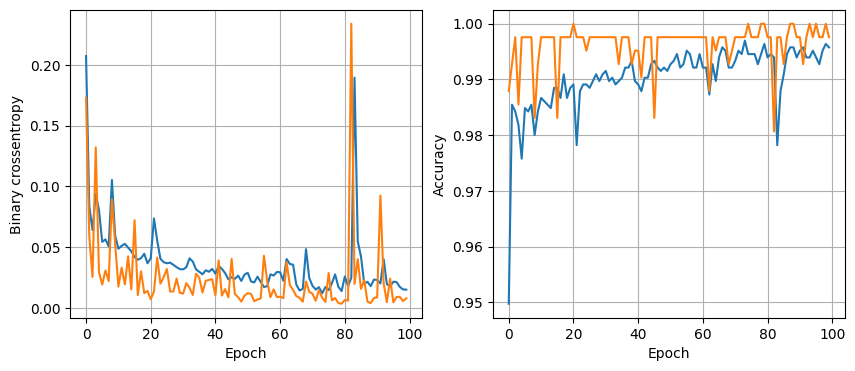

13/13 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9871
64 nodes, dropout 0, lr 0.01, batch size 32


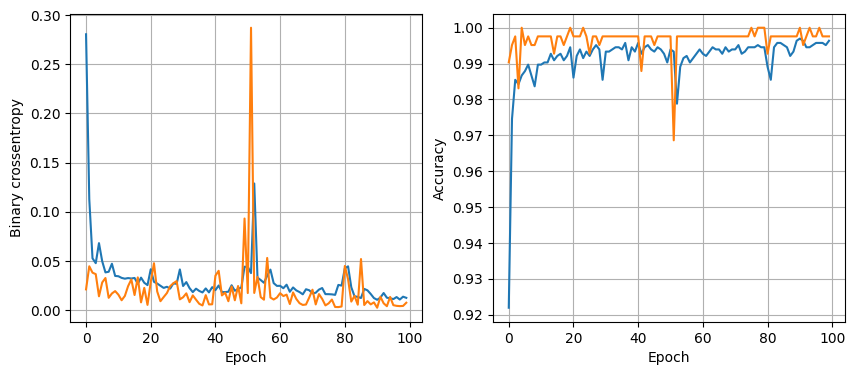

13/13 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9871
64 nodes, dropout 0, lr 0.01, batch size 64


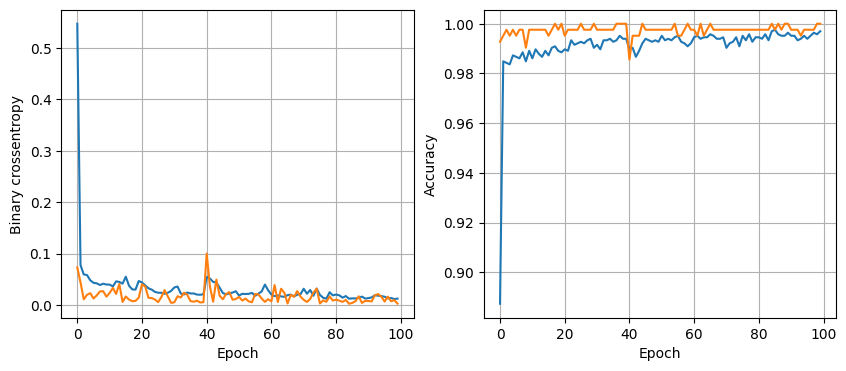

13/13 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9871
64 nodes, dropout 0, lr 0.01, batch size 128


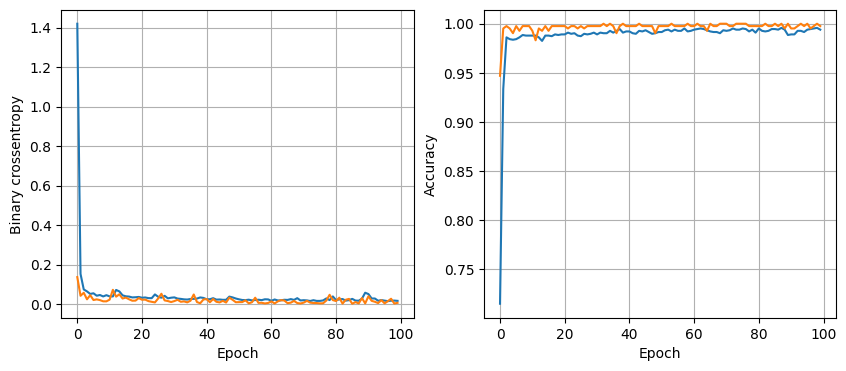

13/13 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9871
64 nodes, dropout 0, lr 0.005, batch size 16


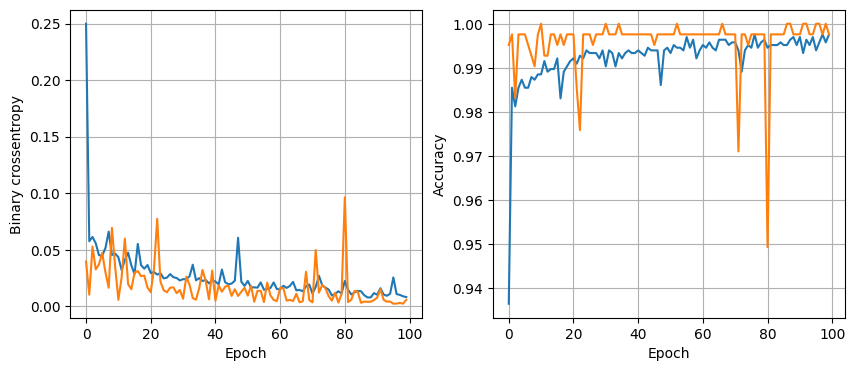

13/13 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9871
64 nodes, dropout 0, lr 0.005, batch size 32


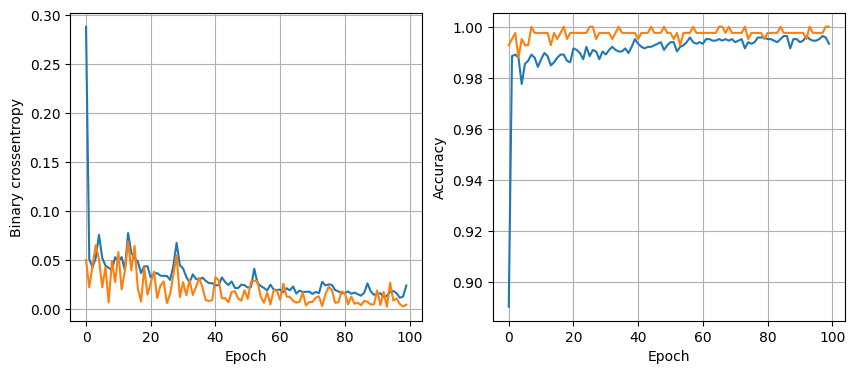

13/13 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.9845
64 nodes, dropout 0, lr 0.005, batch size 64


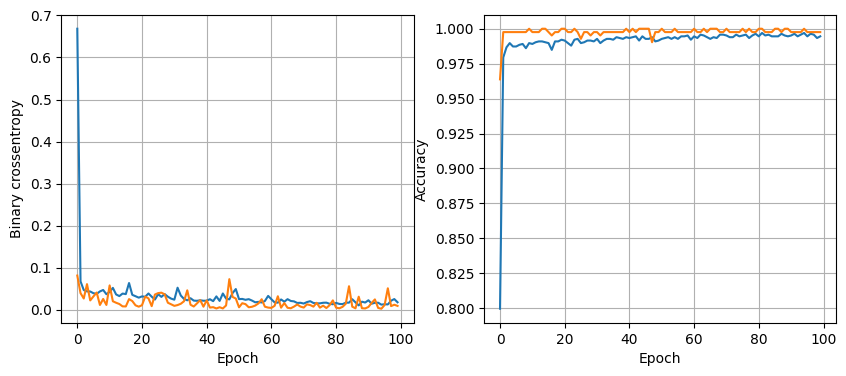

13/13 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9845
64 nodes, dropout 0, lr 0.005, batch size 128


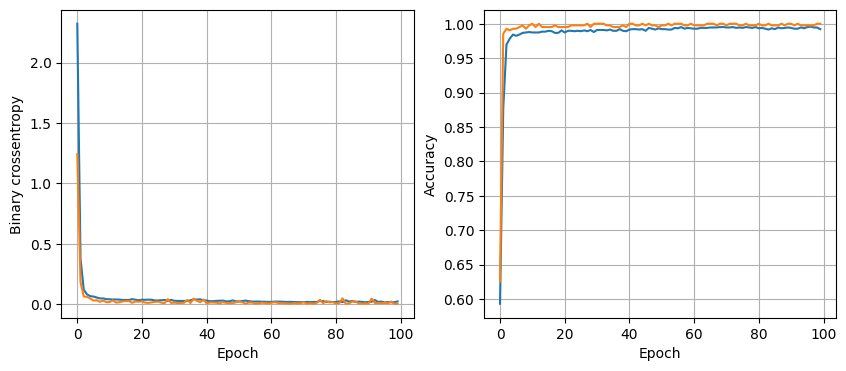

13/13 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9845
64 nodes, dropout 0, lr 0.001, batch size 16


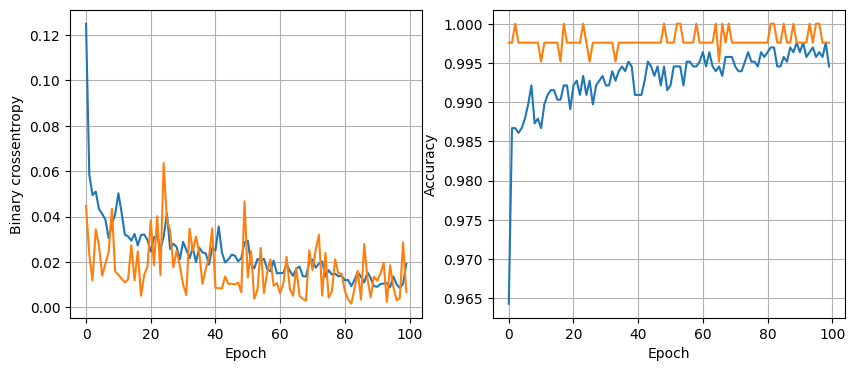

13/13 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9845
64 nodes, dropout 0, lr 0.001, batch size 32


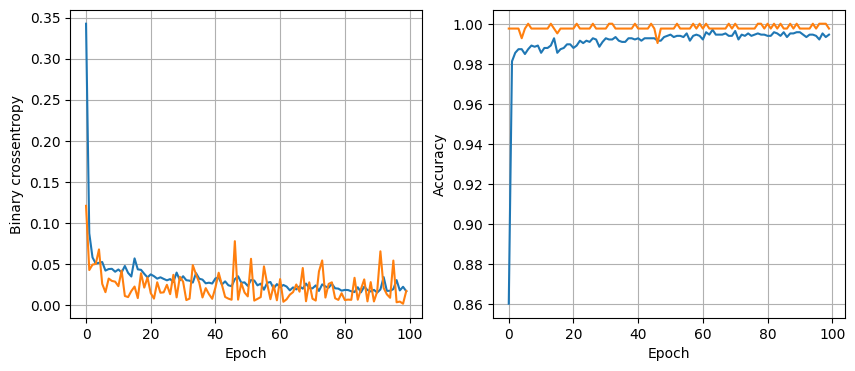

13/13 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9871
64 nodes, dropout 0, lr 0.001, batch size 64


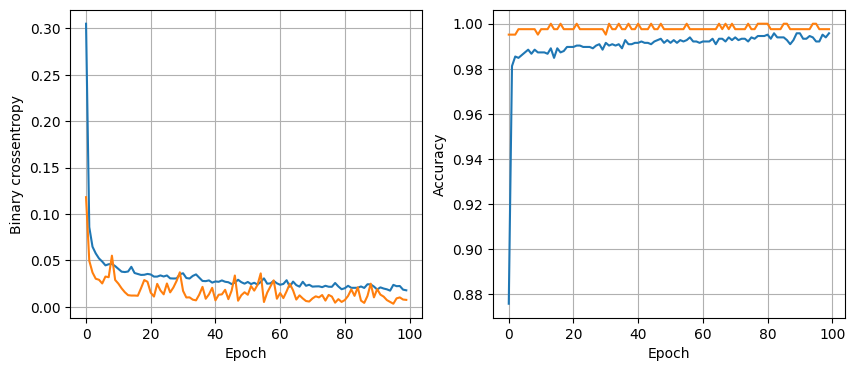

13/13 [==============================] - 0s 6ms/step - loss: 0.0693 - accuracy: 0.9871
64 nodes, dropout 0, lr 0.001, batch size 128


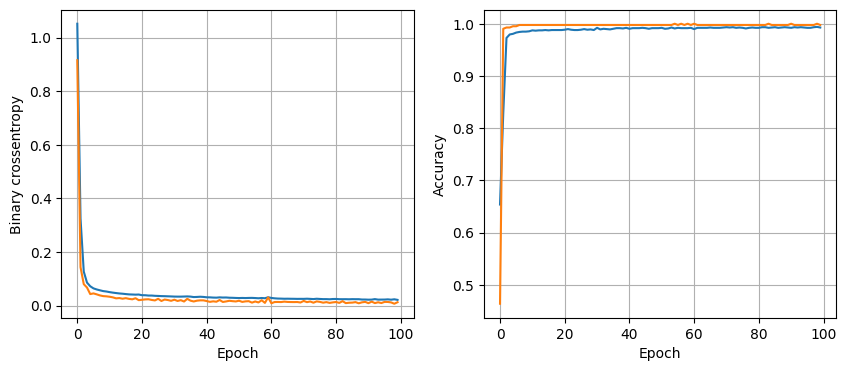

13/13 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9845
64 nodes, dropout 0.2, lr 0.01, batch size 16


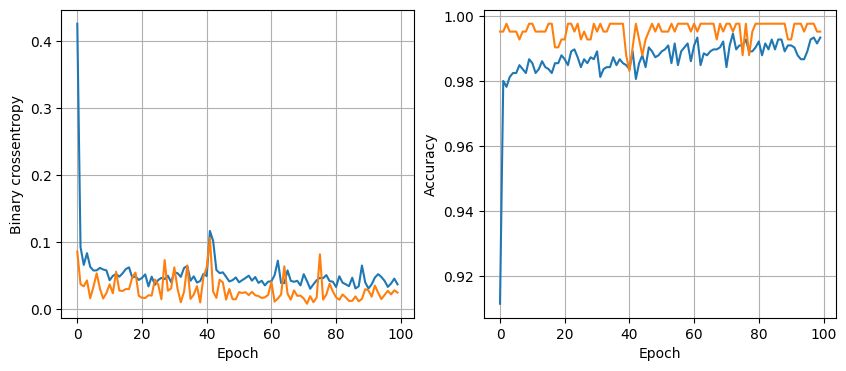

13/13 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9871
64 nodes, dropout 0.2, lr 0.01, batch size 32


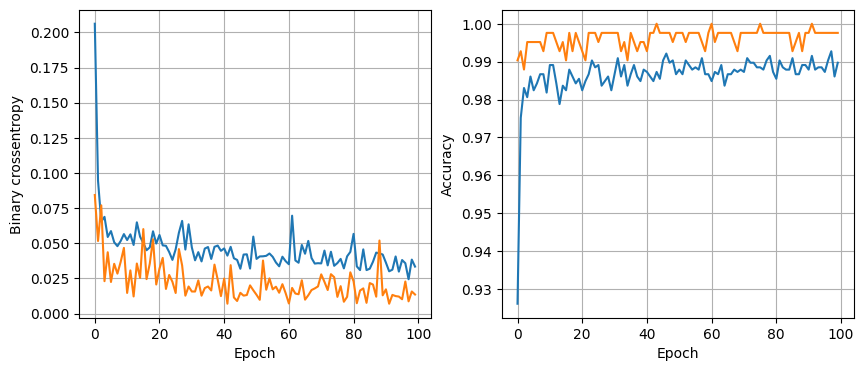

13/13 [==============================] - 0s 3ms/step - loss: 0.1169 - accuracy: 0.9845
64 nodes, dropout 0.2, lr 0.01, batch size 64


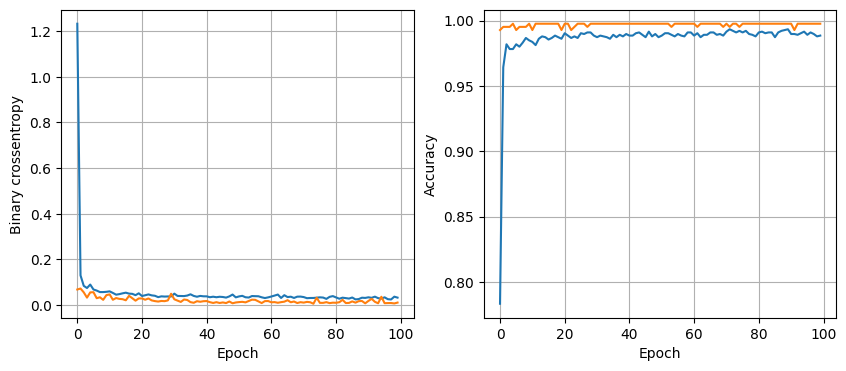

13/13 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9871
64 nodes, dropout 0.2, lr 0.01, batch size 128


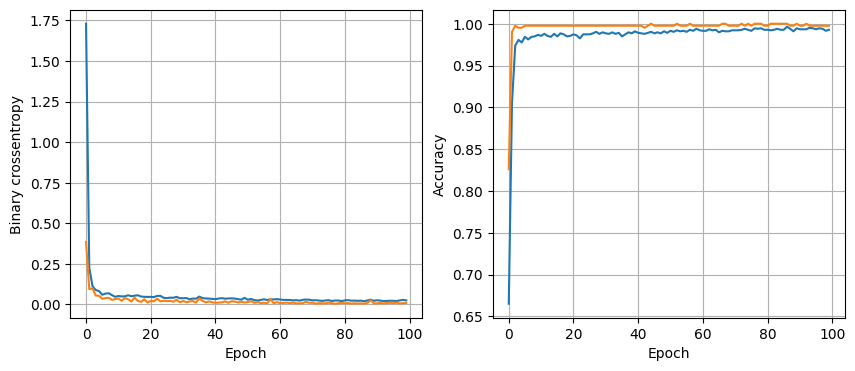

13/13 [==============================] - 0s 3ms/step - loss: 0.0914 - accuracy: 0.9871
64 nodes, dropout 0.2, lr 0.005, batch size 16


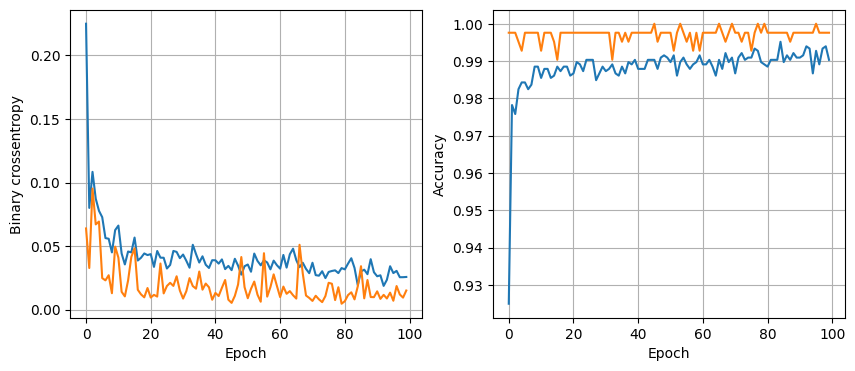

13/13 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.9871
64 nodes, dropout 0.2, lr 0.005, batch size 32


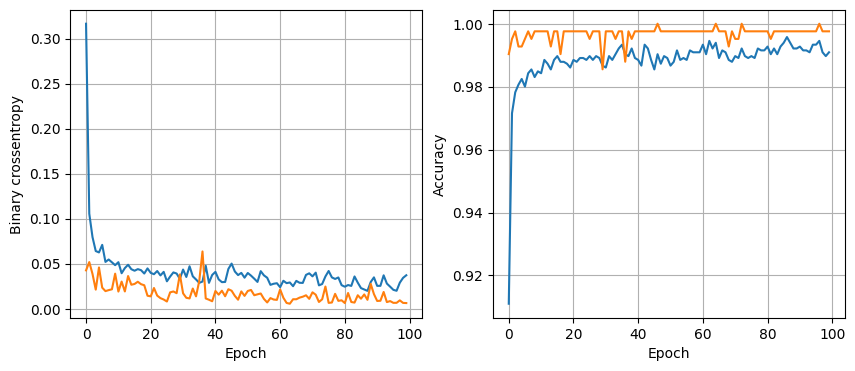

13/13 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.9716
64 nodes, dropout 0.2, lr 0.005, batch size 64


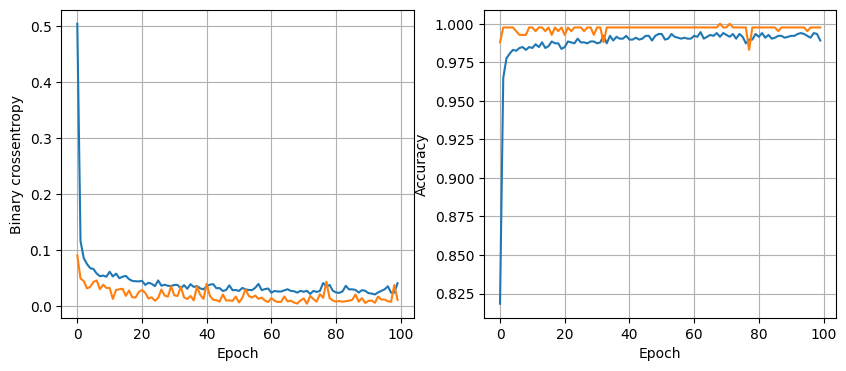

13/13 [==============================] - 0s 4ms/step - loss: 0.1142 - accuracy: 0.9845
64 nodes, dropout 0.2, lr 0.005, batch size 128


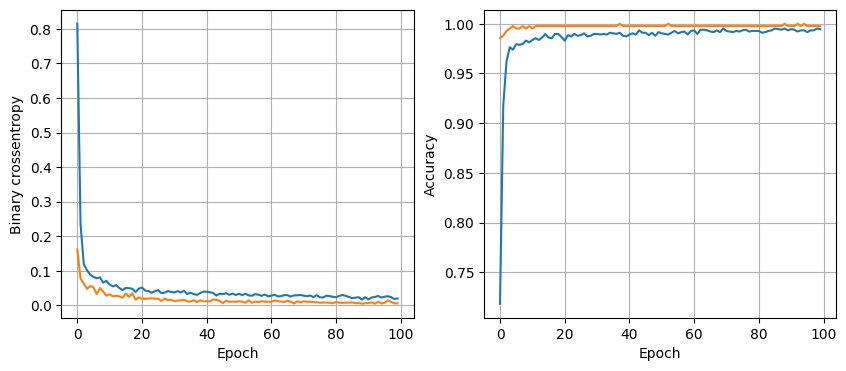

13/13 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9845
64 nodes, dropout 0.2, lr 0.001, batch size 16


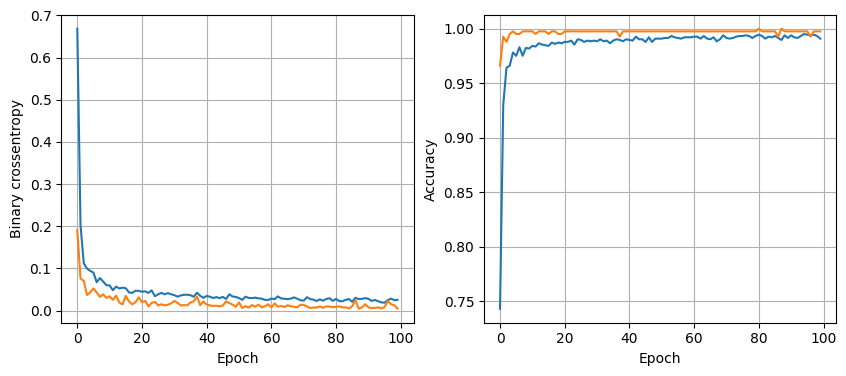

13/13 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9845
64 nodes, dropout 0.2, lr 0.001, batch size 32


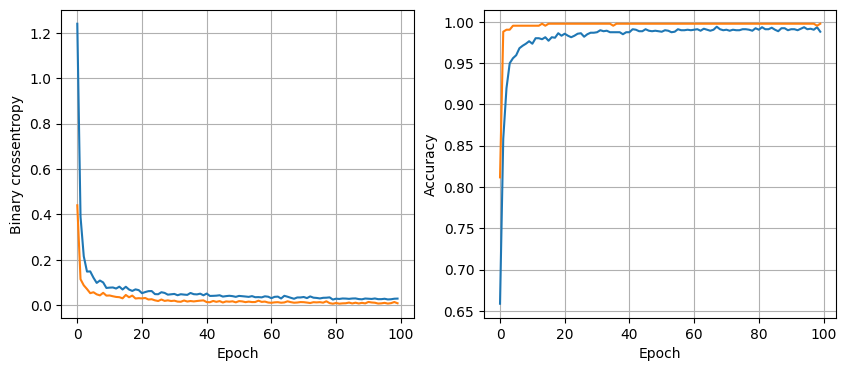

13/13 [==============================] - 0s 5ms/step - loss: 0.0579 - accuracy: 0.9845
64 nodes, dropout 0.2, lr 0.001, batch size 64


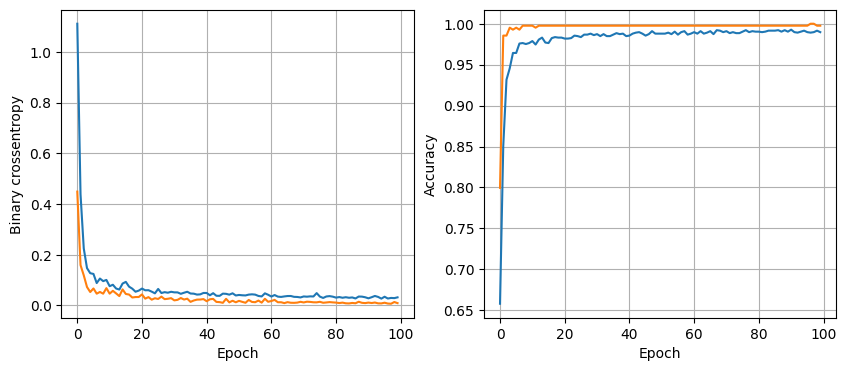

13/13 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.9871
64 nodes, dropout 0.2, lr 0.001, batch size 128


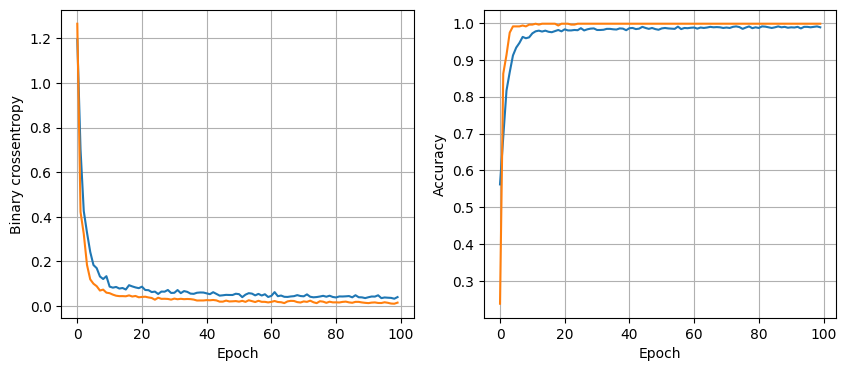

13/13 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9845


In [17]:
# to find the best specification for the neural nets

least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [4,8,16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [16,32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

# EXECUTION TIME : 38MIN

In [18]:
# testing our model's accuracy
from sklearn.metrics import classification_report
Y_pred = least_loss_model.predict(x_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, Y_pred))

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       230
         1.0       0.99      0.99      0.99       158

    accuracy                           0.99       388
   macro avg       0.99      0.99      0.99       388
weighted avg       0.99      0.99      0.99       388



In [19]:
# saving our model
least_loss_model.save('cimta.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from keras.models import load_model
model = load_model('cimta.h5')

In [23]:
model.summary()

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_264 (Dense)           (None, 32)                160       
                                                                 
 dropout_176 (Dropout)       (None, 32)                0         
                                                                 
 dense_265 (Dense)           (None, 32)                1056      
                                                                 
 dropout_177 (Dropout)       (None, 32)                0         
                                                                 
 dense_266 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1249 (4.88 KB)
Trainable params: 1249 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
